<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/1c2025/Practica_3_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase 3: Procesamiento de datos

##EDA: Análisis exploratorio de datos

El análisis exploratorio de datos, EDA, es una etapa crítica en la ciencia de datos y es la base de cualquier uso posterior que se le de a los mismos. En particular, el análisis exploratorio de datos nos permite conocerlos mejor, para saber bien qué preguntas se pueden llegar a contestar con ellos o qué cosas faltan y se necesita buscar/generar, en la medida de lo posible.

Permite:
- Limpiar los datos
- Darse una idea de los datos disponibles y sus características
- Plantear hipótesis/preguntas

In [2]:
#Se importan las librerías:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PARTE 1: Dataset siniestros

Se tienen registros de accidentes en la Ciudad de Buenos Aires entre 2015 y 2018. A continuación, vamos a tratar de entender un poco qué datos se encuentran disponibles y cómo visualizarlos. Con eso podremos pensar si nos "sirve para algo".

Esta Parte 1 es más que nada un repaso de la importancia de limpiar un dataset antes de trabajarlo.

### Carga del dataset

In [3]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Victimas_siniestros_2015-2018.csv to Victimas_siniestros_2015-2018.csv


In [4]:
import io

#Se crea un DataFrame
df_siniestros = pd.read_csv(io.BytesIO(uploaded['Victimas_siniestros_2015-2018.csv']))
df_siniestros.head()

<ipython-input-4-3d2e148543af>:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_siniestros = pd.read_csv(io.BytesIO(uploaded['Victimas_siniestros_2015-2018.csv']))


,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,03-02-15,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,04-09-15,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion


### Primeras caracterísitcas del dataframe

Podemos ver el tamaño del dataset y el nombre de sus columnas...

In [5]:
# Veremos el tamaño de la data y el nombre de la columnas
print('Cantidad de Filas y columnas:', df_siniestros.shape)
print('Nombre columnas:', df_siniestros.columns)

Cantidad de Filas y columnas: (33234, 29)
Nombre columnas: Index(['causa', 'rol', 'tipo', 'sexo', 'edad', 'mes', 'periodo', 'fecha',
       'hora', 'lugar_hecho', 'direccion_normalizada', 'tipo_calle',
       'direccion_normalizada_arcgis', 'calle1', 'altura', 'calle2',
       'codigo_calle', 'codigo_cruce', 'geocodificacion', 'semestre', 'x', 'y',
       'geom', 'cantidad_victimas', 'comuna', 'geom_3857', 'tipo_colision1',
       'participantes_victimas', 'participantes_acusados'],
      dtype='object')


y, más importante, podemos ver el tipo y la cantidad de información disponible en cada columna. Noten que informa cuántos datos no-nulos hay para cada columna.

In [6]:
# Podemos ver, por columna, cuantos valores no nulos hay y el tipo de dato que contiene
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   causa                         33234 non-null  object 
 1   rol                           32899 non-null  object 
 2   tipo                          32134 non-null  object 
 3   sexo                          33037 non-null  object 
 4   edad                          32675 non-null  float64
 5   mes                           33197 non-null  float64
 6   periodo                       33234 non-null  int64  
 7   fecha                         33173 non-null  object 
 8   hora                          33217 non-null  object 
 9   lugar_hecho                   29518 non-null  object 
 10  direccion_normalizada         32469 non-null  object 
 11  tipo_calle                    33234 non-null  object 
 12  direccion_normalizada_arcgis  32462 non-null  object 
 13  c

### Modificación de la clase o tipo asociada a cada columna

Si ven arriba, la columna `fecha` no está en *formato fecha*, lo cual permite setear orden cronológico, calcular tiempos entre eventos y demás funciones de gran utilidad. En cambio, Python hasta acá lo está tratando como un *objeto*, tipo de variable asignado comunmente a lo que es texto cualquiera.

Podemos cambiar esto usando la función o método `to_datetime` de Pandas.

In [7]:
# Modificar el tipo de dato:
df_siniestros['fecha'] = pd.to_datetime(df_siniestros['fecha'],format='mixed')
df_siniestros.dtypes

,0
causa,object
rol,object
tipo,object
sexo,object
edad,float64
mes,float64
periodo,int64
fecha,datetime64[ns]
hora,object
lugar_hecho,object


Del mismo modo. Podemos convertir la variable sexo en vez de "texto" en "categorías".

Esto lo podemos hacer con el método `astype()` de Pandas.

In [8]:
# Otro ejemplo para modificar tipo de dato
df_siniestros['sexo'] = df_siniestros['sexo'].copy().astype('category')
df_siniestros.dtypes

,0
causa,object
rol,object
tipo,object
sexo,category
edad,float64
mes,float64
periodo,int64
fecha,datetime64[ns]
hora,object
lugar_hecho,object


Luego, ¡podemos ver qué categorías existen para la variable!

In [9]:
# Categorias existentes en la variable sexo
pd.Categorical(df_siniestros['sexo'])

[NaN, NaN, 'femenino', NaN, 'masculino', ..., 'masculino', 'femenino', NaN, 'masculino', 'masculino']
Length: 33234
Categories (2, object): ['femenino', 'masculino']

Como ven, existen dos categorías: `Masculino` y `Femenino`. Pero también hay datos que no están en niguna de las dos categorías porque están vacíos.

En estos lugares donde no tenemos el dato Pandas asigna un **NaN (Not a Number)**. ¿Qué hacemos con ellos?

Una opción es dejarlos como están, o eliminarlos (remover datos incompletos). En este caso particular, vamos a crear explicitamente una categoría de nombre "Incierto" para que sea una tercer categoría.

Habrá casos donde esto es de utilidad.

In [10]:
# Reemplazar NaN por categoría "Incierto"
df_siniestros['sexo'] = df_siniestros['sexo'].copy().cat.add_categories('Incierto')
df_siniestros['sexo'] = df_siniestros['sexo'].copy().fillna('Incierto')

In [11]:
pd.Categorical(df_siniestros['sexo'])

['Incierto', 'Incierto', 'femenino', 'Incierto', 'masculino', ..., 'masculino', 'femenino', 'Incierto', 'masculino', 'masculino']
Length: 33234
Categories (3, object): ['femenino', 'masculino', 'Incierto']

Algo similar pasa, por ejemplo, con la variable mes. En cierto casos no está disponible. Si quisieramos convertir esa variable en tipo "Número entero", tendríamos que proponer algo para hacer con los NaN de esa columna.

Existen varios métodos útiles para detectar, eliminar y reemplazar valores nulos en las estructuras de datos de Pandas. Están:

- `isnull()`: genera un booleano (`True` - `False`) indicando los valores faltantes
- `notnull()`: lo opuesto a `isnull()`
- `dropna()`: descarta los valores faltantes.
- `fillna()`: devuelve una copia de los datos con los NaN reemplazados por un valor válido.

En este caso, cambiaremos los datos existentes a `int64` y dejaremos los NaN como tales.

In [12]:
# Otro ejemplo para modificar tipo de dato
df_siniestros['mes'] = df_siniestros['mes'].copy().notnull().astype('int64')
df_siniestros.dtypes

,0
causa,object
rol,object
tipo,object
sexo,category
edad,float64
mes,int64
periodo,int64
fecha,datetime64[ns]
hora,object
lugar_hecho,object


### Descripción de variables del dataset

Utilizando `.describe()` obtenemos una descripción estadística de los datos numéricos: cantidad, media, desvío estándar, percentiles, valores máximo y mínimo.

Veamos, por ejemplo, qué me dice la información disponible para la cantidad de víctimas.

In [13]:
df_siniestros['cantidad_victimas'].describe()

,cantidad_victimas
count,33234.000000
mean,1.229494
std,0.778449
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,18.000000


Algunos de esto valores pueden obtenerse utilizando ciertas funciones, como `.count()`, `.mean()`, `.std()`, `.max()` y `.min()`

In [14]:
mean_vic = df_siniestros['cantidad_victimas'].mean()
print(mean_vic)

1.2294938917975566


**Nota**: La función describe funciona para todas las variables numéricas del dataframe. Esto me permite compararlas rápidamente. En este caso particular no tiene mucho sentido porque la única variable real numérica es la cantidad de víctimas y la edad.

In [15]:
df_siniestros[['edad','cantidad_victimas']].describe()

,edad,cantidad_victimas
count,32675.000000,33234.000000
mean,36.411936,1.229494
std,16.353923,0.778449
min,1.000000,1.000000
25%,25.000000,1.000000
50%,33.000000,1.000000
75%,45.000000,1.000000
max,108.000000,18.000000


### Análisis de duplicados

Para identificar filas duplicadas, se utiliza `.duplicated()` que devuelve un booleano, siendo `True` si se ha encontrado una fila igual a una anterior y `False` en caso contrario. Por otro lado, `.drop_duplicates()` elimina las filas repetidas.

In [16]:
#Encontrar filas duplicadas
df_siniestros.duplicated()#.sum()

,0
0,False
1,False
2,False
3,False
4,False
...,...
33229,False
33230,False
33231,False
33232,False


**¿Qué hacemos con los aparentes duplicados?**

In [17]:
# Filtramos el DataFrame con .loc[]. Permite buscar como si fuera una matriz cualquiera.
df_siniestros.loc[df_siniestros.duplicated() == True]

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
3233,lesiones,conductor,automovil,masculino,29.0,1,2016,2016-04-17,7:45:00,avda la rabida & avda rosales,...,1,-58.369237,-34.606524,0101000020E61000002194D727432F4DC08EB32B93A24D...,4,1.0,0101000020110F0000392AE56E58C958C1E5F01986645C...,multiple,"automovil,automovil,NULL",automovil
3689,lesiones,peaton,peaton,femenino,30.0,1,2016,2016-06-16,18:30:00,dr juan f aranguren y argerich,...,1,-58.473748,-34.625605,0101000020E610000088C14DC7A33C4DC01A623CD71350...,2,7.0,0101000020110F0000E6B06BF7B4D458C11699E40D6F61...,peaton - vehiculo,"peaton,peaton",NaN
6076,lesiones,pasajero,automovil,femenino,52.0,1,2017,2017-06-25,19:15:00,hernndarias y tomas liberti,...,1,-58.369114,-34.631612,0101000020E6100000462D7F233F2F4DC070FD7AA8D850...,2,4.0,0101000020110F00008E6B850555C958C11D9F47570563...,multiple,"automovil,automovil","automovil,automovil"
6384,lesiones,conductor,moto,masculino,31.0,1,2017,2017-07-26,5:30:00,avda cordoba y maure,...,2,-58.449811,-34.582408,0101000020E610000035AEAB6B93394DC0FFD75F578C4A...,2,15.0,0101000020110F00006759A0CF1AD258C179F5D7ED0556...,multiple,"moto,moto",camioneta
7344,lesiones,conductor,automovil,masculino,NaN,1,2018,2018-02-28,6:00:00,NaN,...,1,-58.446250,-34.583986,0101000020E61000002281FDB61E394DC0F849260AC04A...,3,15.0,0101000020110F000069325AB1B7D158C11A2F39977056...,multiple,"automovil,automovil,automovil",automovil
7345,lesiones,conductor,automovil,masculino,NaN,1,2018,2018-02-28,6:00:00,NaN,...,1,-58.446250,-34.583986,0101000020E61000002281FDB61E394DC0F849260AC04A...,3,15.0,0101000020110F000069325AB1B7D158C11A2F39977056...,multiple,"automovil,automovil,automovil",automovil
7682,lesiones,conductor,moto,masculino,42.0,1,2018,2018-03-02,19:58:00,NaN,...,1,-58.427797,-34.622073,0101000020E6100000C66A270EC2364DC03B649E1AA04F...,2,6.0,0101000020110F0000E971BF27B6CF58C1465291278060...,multiple,"moto,moto",automovil
8129,lesiones,conductor,moto,masculino,35.0,1,2018,2018-05-19,8:15:00,NaN,...,1,-58.385029,-34.587035,0101000020E6100000A945D6A048314DC019C5F4F5234B...,2,2.0,0101000020110F0000145A40EC0FCB58C19111C6BF3E57...,multiple,"moto,moto","automovil,automovil"
10224,lesiones,conductor,taxi/remis,masculino,58.0,1,2015,2015-08-22,4:15:00,av. san juan y sanchez de loria,...,2,-58.412094,-34.624969,0101000020E6100000F12FDD7FBF344DC02A67F7FDFE4F...,3,5.0,0101000020110F0000B280912401CE58C15E81B3044461...,multiple,"taxi/remis,taxi/remis","taxi/remis,taxi/remis"
10870,lesiones,pasajero,moto,femenino,23.0,1,2016,2016-01-14,18:30:00,alberti y humberto primo,...,1,-58.400612,-34.622219,0101000020E6100000C105F83E47334DC05502E6DEA44F...,4,3.0,0101000020110F0000DFAA3397C1CC58C1E6B25FFE8960...,multiple,moto,"moto,moto"


Analicemos con mayor profundidad, qué ocurre en las filas:

- 11141, 11142, 11143 y 11144

In [18]:
x_0 = 11141
x_f = 11144 +1
# iloc es para definir el número de indicie
df_siniestros.iloc[x_0 : x_f]

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
11141,lesiones,conductor,automovil,masculino,NaN,1,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN
11142,lesiones,conductor,automovil,masculino,NaN,1,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN
11143,lesiones,conductor,automovil,masculino,NaN,1,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN
11144,lesiones,conductor,automovil,masculino,NaN,1,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN


¡Queda claro con esto que es el mismo accidente! Son 4 filas, 1 por cada una de las 4 víctimas fatales del accidente. Al no tener más información que el hecho de que eran conductores masculinos, quedan repetidas.

En este caso, nos vemos tentandos (tal vez) a quedarnos con una sola que representa a todas.

In [19]:
# Elimino las filas duplicadas
df_siniestros.drop_duplicates()

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,Incierto,NaN,1,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,Incierto,NaN,1,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,1,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,Incierto,NaN,1,2015,2015-03-02,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,1,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,lesiones,conductor,transporte publico,masculino,26.0,1,2018,2018-05-31,20:00:00,NaN,...,1,-58.380960,-34.604036,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico"""
33230,lesiones,pasajero,automovil,femenino,32.0,1,2018,2018-05-31,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33231,lesiones,NaN,NaN,Incierto,NaN,1,2018,2018-05-31,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33232,lesiones,conductor,moto,masculino,34.0,1,2018,2018-05-31,14:15:00,NaN,...,1,-58.450768,-34.588691,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil


Es posible definir con claridad que columnas se tendrán en cuenta a la hora de decir "estas filas están repetidas". Abajo, un ejemplo.

In [20]:
#Podemos especificar qué columnas no deben repetirse, antes de droppear
df_siniestros.drop_duplicates(
    subset=['causa', 'mes', 'periodo', 'fecha', 'hora', 'lugar_hecho',
            'semestre', 'x', 'y', 'geom', 'cantidad_victimas', 'tipo_colision1',
            'participantes_victimas', 'participantes_acusados'])

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,Incierto,NaN,1,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,Incierto,NaN,1,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,1,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,Incierto,NaN,1,2015,2015-03-02,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,1,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33228,lesiones,conductor,moto,masculino,44.0,1,2018,2018-05-30,17:10:00,NaN,...,1,NaN,NaN,NaN,1,NaN,NaN,motovehiculo - vehiculo,moto,camioneta
33229,lesiones,conductor,transporte publico,masculino,26.0,1,2018,2018-05-31,20:00:00,NaN,...,1,-58.380960,-34.604036,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico"""
33230,lesiones,pasajero,automovil,femenino,32.0,1,2018,2018-05-31,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33232,lesiones,conductor,moto,masculino,34.0,1,2018,2018-05-31,14:15:00,NaN,...,1,-58.450768,-34.588691,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil


### Agrupando categorías

Observemos la columna **tipo** de valores categóricos. **¿Es necesaria alguna corrección en los datos?**

In [21]:
# Contabilizar la frecuenta por valor único
df_siniestros['tipo'].unique()

array(['moto', nan, 'peaton', 'camion', 'automovil', 'transporte publico',
       'auto pfa / movil / gendarmeria / metropolitana / moto movil',
       'utilitario', 'bicicleta', 'camioneta', 'taxi/remis', 'ambulancia',
       'fuerza seguridad', 'otros', 'cuatriciclo', 'autobomba',
       'traccion a sangre', 'vehiculo oficial', 'omnibus / minibus',
       'transporte de cargas / grua', 'transporte escolar',
       'tren / subte', 'patineta', 'vehiculo rural',
       'tren / subte / tranvia'], dtype=object)

Parece un exceso de presición, ¿no? Sería más rico para el análisis agrupar todas estas variantes.

In [22]:
# Reemplazaremos ciertos valores
df_siniestros['tipo'] = df_siniestros['tipo'].copy().replace('tren / subte', 'tren / subte / tranvia')
df_siniestros['tipo'] = df_siniestros['tipo'].copy().replace('auto pfa / movil / gendarmeria / metropolitana / moto movil', 'fuerza seguridad')

In [23]:
df_siniestros['tipo'].unique()

array(['moto', nan, 'peaton', 'camion', 'automovil', 'transporte publico',
       'fuerza seguridad', 'utilitario', 'bicicleta', 'camioneta',
       'taxi/remis', 'ambulancia', 'otros', 'cuatriciclo', 'autobomba',
       'traccion a sangre', 'vehiculo oficial', 'omnibus / minibus',
       'transporte de cargas / grua', 'transporte escolar',
       'tren / subte / tranvia', 'patineta', 'vehiculo rural'],
      dtype=object)

...así podría estar un rato largo dejando sólo las variantes que me interesan.

### Creación de variables categóricas

Observemos la columna **edad**. **¿Podríamos crear valores categóricos ordinales?**

Podríamos agregar la columna **grupo_etario** en el DataFrame, que agrupe los accidentados según su edad en:
*   Menor: menores de 17 años
*   Joven adulto: entre 17 y 35 años inclusive
*   Adulto: entre 35 y 65 años inclusive
*   Adulto mayor: mayores de 65 años

¿Para qué haría esto? Puede ser muy útil para la visualización posterior de los datos. En otros casos, permite compatibilizar información de distintas fuentes con distinto nivel de detalle.

In [24]:
#Veamos los valores únicos para las edades:
df_siniestros['edad'].unique()

array([ nan,  18.,  26.,  24.,  37.,  19.,  23.,  20.,  17.,  29.,  30.,
        14.,   7.,   1.,  10.,  41.,  43.,  38.,  22.,  60.,  35.,  36.,
        50.,  54.,  64.,  59.,  55.,  61.,  72.,  70.,  73.,  66.,  79.,
        81.,  83.,  82.,  95.,  16.,  44.,  13.,  31.,  28.,  32.,  34.,
        27.,  33.,  40.,  58.,  15.,  21.,  42.,  57.,  87.,  51.,  25.,
        53.,  46.,  80.,  65.,  39.,  69.,  63.,  68.,  75.,  76.,   5.,
        84.,  74.,  49.,   8.,  45.,   9.,  56.,   6.,  78.,  62.,  52.,
        47.,  71.,  12.,  48.,  67.,  11., 108.,  85.,   3.,  92.,  89.,
       102.,  77.,   2.,  86.,  93.,   4.,  88.,  90.,  91.,  96.,  94.,
       105.,  99., 100., 103., 106., 101.])

In [25]:
# crear lista de las condiciones
conditions = [
    df_siniestros['edad'] <= 17.,
    (df_siniestros['edad'] > 17.) & (df_siniestros['edad'] <= 35.),
    (df_siniestros['edad'] > 35.) & (df_siniestros['edad'] <= 65.),
    (df_siniestros['edad'] > 65.)
    ]

# crear lista de los valores que se quieren asignar a cada condición
values = ['menor', 'joven_adulto', 'adulto', 'adulto_mayor']

# crear columna nueva y usar np.select() para asignarle valores usando las listas como argumentos
df_siniestros['grupo_etario'] = np.select(conditions, values,default='incierto')
df_siniestros['grupo_etario'] = df_siniestros['grupo_etario'].copy().astype('category')

# mostrar el DataFrame actualizado
df_siniestros.head()

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,grupo_etario
0,homicidio,conductor,moto,Incierto,NaN,1,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil,incierto
1,homicidio,NaN,NaN,Incierto,NaN,1,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN,incierto
2,homicidio,peaton,peaton,femenino,NaN,1,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico""",incierto
3,homicidio,NaN,NaN,Incierto,NaN,1,2015,2015-03-02,18:30:00,lavalle 1730,...,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN,incierto
4,homicidio,pasajero,camion,masculino,NaN,1,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion,incierto


In [26]:
#No tenemos la edad de todos, entonces si aparece NaN, quedó incierto:
df_siniestros['grupo_etario'].unique()

['incierto', 'joven_adulto', 'adulto', 'menor', 'adulto_mayor']
Categories (5, object): ['adulto', 'adulto_mayor', 'incierto', 'joven_adulto', 'menor']

In [27]:
df_siniestros.dtypes

,0
causa,object
rol,object
tipo,object
sexo,category
edad,float64
mes,int64
periodo,int64
fecha,datetime64[ns]
hora,object
lugar_hecho,object


### Agrupando Datos

`.groupby()` nos permite separar los datos en grupos para facilitar el análisis. Por ejemplo, podemos:

* Agrupar por **sexo**, **rol**, **tipo_calle** a las personas que participaron en los accidentes.

In [28]:
# Con la función de groupby generamos un nuevo DataFrame
df_causa = df_siniestros.groupby(['tipo_calle', 'rol']).agg('size')
df_causa = pd.DataFrame(df_causa).rename(columns={0:'cantidad'})

df_causa

cantidad
tipo_calle rol                           
autopista  ciclista                     2
           conductor                   98
           pasajero                    34
           peaton                      15
avenida    ciclista                   964
           ciclista + peaton            7
           conductor                11543
           conductor + ciclista         8
           conductor + pasajero         7
           conductor + peaton          28
           pasajero                  3614
           pasajero + peaton           14
           peaton                    4979
calle      ciclista                   911
           ciclista + peaton            5
           conductor                 5999
           conductor + ciclista         8
           conductor + pasajero         3
           conductor + peaton           4
           pasajero                  1844
           pasajero + peaton            1
           peaton                    2811

* Agrupar por **período (año)** y **semestre**:

In [29]:
df_siniestros.groupby(['periodo', 'semestre']).agg('size')

periodo  semestre
2015     1           4808
         2           5095
2016     1           4961
         2           4919
2017     1           4636
         2           5106
2018     1           3709
dtype: int64

### Visualización

#### Histogramas (conteos)

Note que es equivalente a graficar con el conocido **count plot**:

Para ver el número de veces que los valores de una columna se repite podriamos usar `.value_counts()` o realizar un histograma:

In [30]:
df_siniestros['edad'].value_counts()

,count
edad,
30.0,1249
25.0,1153
26.0,1139
24.0,1073
27.0,1069
...,...
105.0,1
100.0,1
103.0,1


A la hora de graficar un histograma, necesitamos definir en número de bins (ventanas) para agrupar los valores y de esta manera conocer la forma de la distribución.

Una propuesta para calcular un número de bins adecuado es la regla de Sturges, que es función del número de muestras:


$$ N_{bins} = \log_2 (n) + 1 $$


In [31]:
# Regla de Sturges
n = df_siniestros.shape[0]
nbins = int(np.log2(n)+1)

print("El número de bins calculado con la regla de Sturges es", nbins)

El número de bins calculado con la regla de Sturges es 16


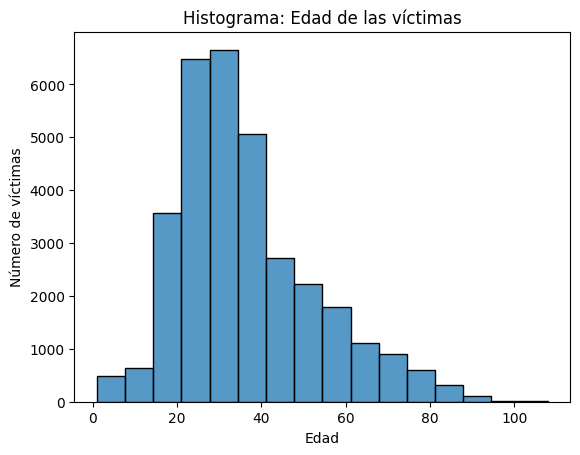

In [33]:
# Histograma con Seaborn
sns.histplot(
    data = df_siniestros, x='edad', bins='sturges'
    ).set(title='Histograma: Edad de las víctimas', ylabel='Número de víctimas', xlabel='Edad')
plt.show()

Agragando `stat='probability'` podemos calcular la probabilidad

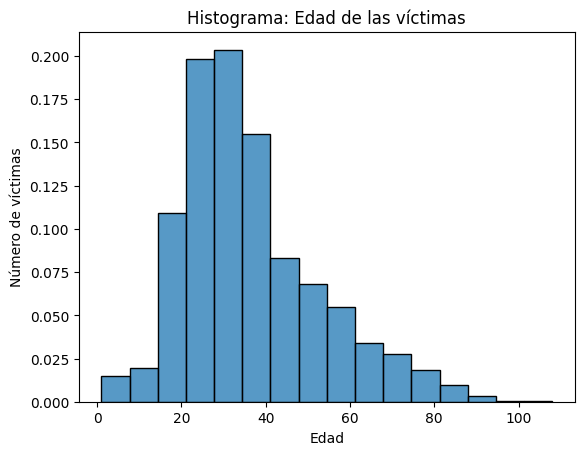

In [34]:
# Histograma con Seaborn
sns.histplot(
    data = df_siniestros, x='edad', bins='sturges', stat='probability'
    ).set(title='Histograma: Edad de las víctimas', ylabel='Número de víctimas', xlabel='Edad')
plt.show()

Podríamos agregar una variable más al análisis con `hue`, por ejemplo el sexo:



[Text(0.5, 1.0, 'Histograma: Edad de las víctimas por sexo'),
 Text(0, 0.5, 'Número de víctimas'),
 Text(0.5, 0, 'Edad')]

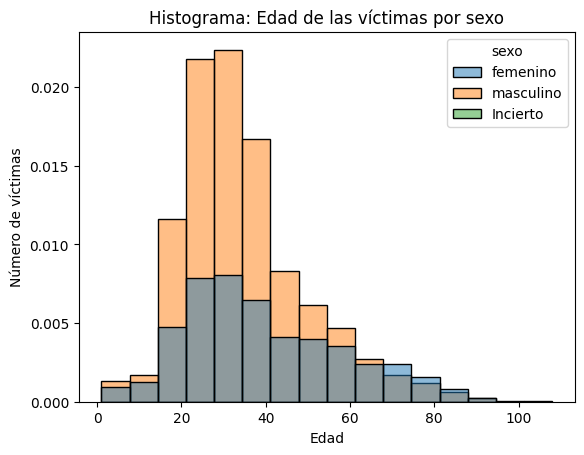

In [35]:
# Histograma con Seaborn
sns.histplot(
    data=df_siniestros, x='edad', hue='sexo', bins='sturges', stat='density'
    ).set(title='Histograma: Edad de las víctimas por sexo', ylabel='Número de víctimas', xlabel='Edad')

Alguno de los datos que agrupamos a mano se podían también obtener directamente de un countplot. La pregunta es si quería guardarme esos datos de conteo para otra cosa o no.

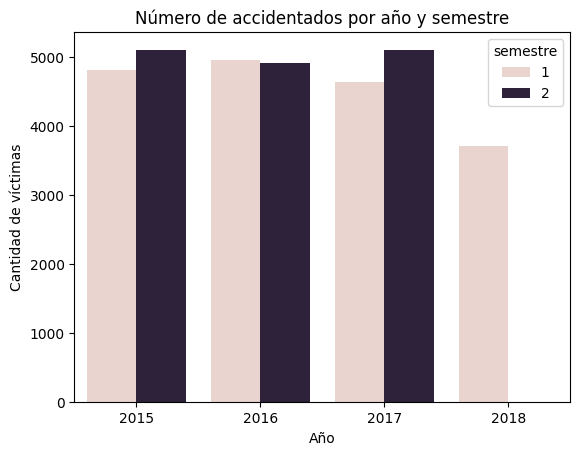

In [36]:
sns.countplot(
    data=df_siniestros, x='periodo', hue='semestre'
    ).set(title='Número de accidentados por año y semestre', ylabel='Cantidad de víctimas', xlabel='Año')
plt.show()


* Si quisieramos ver una variable más, podemos agregar **columnas de gráficos** de `col`:

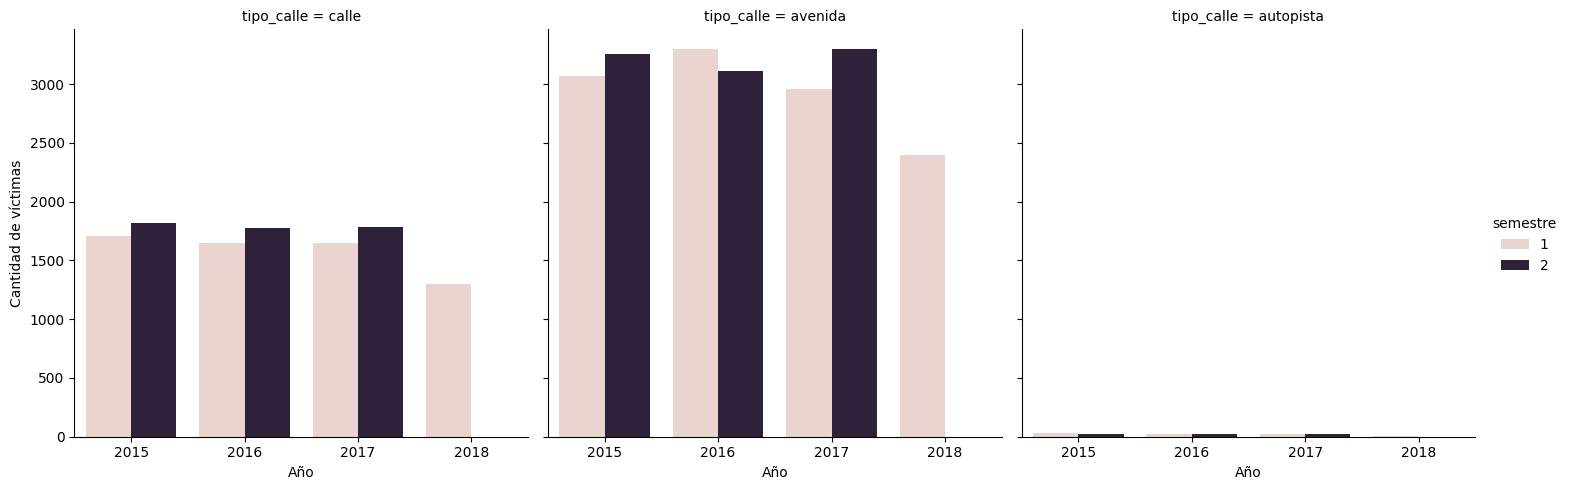

In [37]:
sns.catplot(
    data=df_siniestros, x='periodo', hue='semestre', col='tipo_calle', kind='count'
    ).set(ylabel='Cantidad de víctimas', xlabel='Año')
plt.show()

## PARTE 2: Dataset lluvias CABA

En esta segunda parte veremos la limpieza y análisis preliminar de las lluvias en CABA desde 1906 hasta hoy. Contamos con los datos de lluvia diaria en `mm`.

En esta Parte 2 podremos ver nuevamente cómo ordenar los datos, pero también más sobre la creación de variables y otras visualizaciones para empezar a preguntarse cómo es el régimen de lluvia y cómo predecirlo.

### Carga del dataset

In [38]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving PRECIPITACIONES.csv to PRECIPITACIONES.csv


In [39]:
import io

#Se crea un DataFrame
df_lluvia = pd.read_csv(io.BytesIO(uploaded['PRECIPITACIONES.csv']),encoding='ISO-8859-1', sep=';', skiprows=5, header=0)
df_lluvia

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,S/P,S/P,S/P,S/P,S/P,0.4,3.9,25.2,S/P,S/P,S/P,13.3
1,2,S/P,0.1,S/P,S/P,S/P,3.6,2.5,0.2,S/P,S/P,S/P,0.2
2,3,S/P,S/P,S/P,S/P,S/P,1.7,S/P,S/P,S/P,S/P,12.7,S/P
3,4,S/P,S/P,S/P,S/P,S/P,1.5,S/P,S/P,11.2,S/P,S/P,4
4,5,S/P,S/P,S/P,S/P,0.3,S/P,S/P,S/P,S/P,S/P,14.8,S/P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,28,S/P,S/P,S/P,<0.1,S/P,S/P,S/P,S/P,NaN,NaN,NaN,NaN
4512,29,S/P,0.1,S/P,<0.1,S/P,S/P,S/P,S/P,NaN,NaN,NaN,NaN
4513,30,S/P,NaN,<0.1,3,S/P,S/P,S/P,84.1,NaN,NaN,NaN,NaN
4514,31,S/P,NaN,<0.1,NaN,S/P,NaN,S/P,34,NaN,NaN,NaN,NaN


### Primeras caracterísitcas del dataframe

Podemos ver el tamaño del dataset y el nombre de sus columnas...

In [40]:
# Veremos el tamaño de la data y el nombre de la columnas
print('Cantidad de Filas y columnas:', df_lluvia.shape)
print('Nombre columnas:', df_lluvia.columns)

Cantidad de Filas y columnas: (4516, 13)
Nombre columnas: Index(['Día', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'],
      dtype='object')


y, más importante, podemos ver el tipo y la cantidad de información disponible en cada columna:

In [41]:
# Podemos ver, por columna, cuantos valores no nulos hay y el tipo de dato que contiene
df_lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Día     4516 non-null   object
 1   Ene     3925 non-null   object
 2   Feb     3599 non-null   object
 3   Mar     3926 non-null   object
 4   Abr     3807 non-null   object
 5   May     3925 non-null   object
 6   Jun     3806 non-null   object
 7   Jul     3924 non-null   object
 8   Ago     3925 non-null   object
 9   Sep     3776 non-null   object
 10  Oct     3894 non-null   object
 11  Nov     3776 non-null   object
 12  Dic     3893 non-null   object
dtypes: object(13)
memory usage: 458.8+ KB


El dataset viene en forma horrible. Nosotros lo que queremos es una lista de lluvias por día en orden cronológico. ¡Esto nos va a llevar un poco de tiempo armarlo!

### Limpieza y Ordenamiento

Por un lado, tenemos filas de nombre que no son datos, hay que eliminarlos. Es por cómo vienen los datos en el CSV, donde había sectores enteros simplemente de explicación.

In [42]:
# nombres de filas
df_lluvia['Día'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'Total', ' ',
       'Estación Meteorológica   Buenos Aires Observatorio',
       'Año 1907 Precipitaciones Diarias (mm) ', 'Datos Preliminares',
       'Día', 'Año 1908 Precipitaciones Diarias (mm) ',
       'Año 1909 Precipitaciones Diarias (mm) ',
       'Año 1910 Precipitaciones Diarias (mm) ',
       'Año 1911 Precipitaciones Diarias (mm) ',
       'Año 1912 Precipitaciones Diarias (mm) ',
       'Año 1913 Precipitaciones Diarias (mm) ',
       'Año 1914 Precipitaciones Diarias (mm) ',
       'Año 1915 Precipitaciones Diarias (mm) ',
       'Año 1916 Precipitaciones Diarias (mm) ',
       'Año 1917 Precipitaciones Diarias (mm) ',
       'Año 1918 Precipitaciones Diarias (mm) ',
       'Año 1919 Precipitaciones Diarias (mm) ',
       'Año 1920 Precipitaciones Diarias (mm) ',
       'Año 

In [43]:
row_keep = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31']

# Guardar solo los datos asociados a Días reales
df_lluvia = df_lluvia.copy()[df_lluvia['Día'].isin(row_keep)].reset_index(drop=True)
df_lluvia

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,S/P,S/P,S/P,S/P,S/P,0.4,3.9,25.2,S/P,S/P,S/P,13.3
1,2,S/P,0.1,S/P,S/P,S/P,3.6,2.5,0.2,S/P,S/P,S/P,0.2
2,3,S/P,S/P,S/P,S/P,S/P,1.7,S/P,S/P,S/P,S/P,12.7,S/P
3,4,S/P,S/P,S/P,S/P,S/P,1.5,S/P,S/P,11.2,S/P,S/P,4
4,5,S/P,S/P,S/P,S/P,0.3,S/P,S/P,S/P,S/P,S/P,14.8,S/P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,27,S/P,S/P,S/P,S/P,<0.1,S/P,S/P,S/P,NaN,NaN,NaN,NaN
3685,28,S/P,S/P,S/P,<0.1,S/P,S/P,S/P,S/P,NaN,NaN,NaN,NaN
3686,29,S/P,0.1,S/P,<0.1,S/P,S/P,S/P,S/P,NaN,NaN,NaN,NaN
3687,30,S/P,NaN,<0.1,3,S/P,S/P,S/P,84.1,NaN,NaN,NaN,NaN


In [44]:
df_lluvia['Día'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

Cada 31 filas cambia el año, así que puedo generar un loop para armar el dataset. Primero, defino el año asociada a cada fila.

In [45]:
# año inicial
ano_ini = 1906

# creo la columna año
df_lluvia['Año'] = 1906

# itero en los las filas de mi dataset para sumar cada "31 dias"
for i in range(df_lluvia.shape[0]):
  df_lluvia.loc[i,'Año'] = int(ano_ini + int(i/31))

df_lluvia

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Año
0,1,S/P,S/P,S/P,S/P,S/P,0.4,3.9,25.2,S/P,S/P,S/P,13.3,1906
1,2,S/P,0.1,S/P,S/P,S/P,3.6,2.5,0.2,S/P,S/P,S/P,0.2,1906
2,3,S/P,S/P,S/P,S/P,S/P,1.7,S/P,S/P,S/P,S/P,12.7,S/P,1906
3,4,S/P,S/P,S/P,S/P,S/P,1.5,S/P,S/P,11.2,S/P,S/P,4,1906
4,5,S/P,S/P,S/P,S/P,0.3,S/P,S/P,S/P,S/P,S/P,14.8,S/P,1906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,27,S/P,S/P,S/P,S/P,<0.1,S/P,S/P,S/P,NaN,NaN,NaN,NaN,2024
3685,28,S/P,S/P,S/P,<0.1,S/P,S/P,S/P,S/P,NaN,NaN,NaN,NaN,2024
3686,29,S/P,0.1,S/P,<0.1,S/P,S/P,S/P,S/P,NaN,NaN,NaN,NaN,2024
3687,30,S/P,NaN,<0.1,3,S/P,S/P,S/P,84.1,NaN,NaN,NaN,NaN,2024


Luego, ¡hago un reordenamiento de los datos! Para esto podemos usar la función `melt` de Pandas, que es una forma de mergear valores.

In [46]:
# Armo una matriz de datos
df_lluvia = df_lluvia.copy().melt(id_vars=['Día','Año'],var_name='Mes',
                                   value_name='Precipitación')
df_lluvia

,Día,Año,Mes,Precipitación
0,1,1906,Ene,S/P
1,2,1906,Ene,S/P
2,3,1906,Ene,S/P
3,4,1906,Ene,S/P
4,5,1906,Ene,S/P
...,...,...,...,...
44263,27,2024,Dic,NaN
44264,28,2024,Dic,NaN
44265,29,2024,Dic,NaN
44266,30,2024,Dic,NaN


Ahora podemos trabajar el dataframe un poco más. primero, podemos eliminar los **NaN** (días que no existen, como el 31 de febrero)

In [47]:
df_lluvia = df_lluvia.copy().dropna().reset_index(drop=True)
df_lluvia

,Día,Año,Mes,Precipitación
0,1,1906,Ene,S/P
1,2,1906,Ene,S/P
2,3,1906,Ene,S/P
3,4,1906,Ene,S/P
4,5,1906,Ene,S/P
...,...,...,...,...
43338,27,2023,Dic,6.3
43339,28,2023,Dic,S/P
43340,29,2023,Dic,S/P
43341,30,2023,Dic,S/P


Ahora vamos a generar la fecha y ordenar cronológicamente

In [48]:
#diccionario que relaciona mes con numero
dic_mes = {'Ene':1,'Feb':2,'Mar':3,'Abr':4,'May':5,'Jun':6,'Jul':7,
           'Ago':8,'Sep':9,'Oct':10,'Nov':11,'Dic':12}

# Cambiar columna mes a números
df_lluvia['Mes'] = df_lluvia['Mes'].copy().replace(dic_mes)

# Crear
df_lluvia['Fecha'] = pd.to_datetime(df_lluvia['Año'].astype(str) + '-' +
                                    df_lluvia['Mes'].astype(str) + '-' + df_lluvia['Día'].astype(str),
                                    format='ISO8601')
df_lluvia

<ipython-input-48-a4b220045c39>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_lluvia['Mes'] = df_lluvia['Mes'].copy().replace(dic_mes)


,Día,Año,Mes,Precipitación,Fecha
0,1,1906,1,S/P,1906-01-01
1,2,1906,1,S/P,1906-01-02
2,3,1906,1,S/P,1906-01-03
3,4,1906,1,S/P,1906-01-04
4,5,1906,1,S/P,1906-01-05
...,...,...,...,...,...
43338,27,2023,12,6.3,2023-12-27
43339,28,2023,12,S/P,2023-12-28
43340,29,2023,12,S/P,2023-12-29
43341,30,2023,12,S/P,2023-12-30


In [49]:
# ordernar cronologicamente los datos
df_lluvia = df_lluvia.copy().sort_values(by='Fecha').reset_index(drop=True)

df_lluvia

,Día,Año,Mes,Precipitación,Fecha
0,1,1906,1,S/P,1906-01-01
1,2,1906,1,S/P,1906-01-02
2,3,1906,1,S/P,1906-01-03
3,4,1906,1,S/P,1906-01-04
4,5,1906,1,S/P,1906-01-05
...,...,...,...,...,...
43338,27,2024,8,S/P,2024-08-27
43339,28,2024,8,S/P,2024-08-28
43340,29,2024,8,S/P,2024-08-29
43341,30,2024,8,84.1,2024-08-30


Veamos un poco más qué tipos de datos tengo en `Precipitación`.

In [50]:
df_lluvia['Precipitación'].unique()

array(['S/P', '4', '1.2', '28.4', '10.5', '0.1', '1.7', '5.9', '11.3',
       '0.7', '2', '13', '33.7', '80.6', '7.9', '8', '0.2', '6.5', '1.1',
       '0.3', '8.3', '15.2', '1', '0.4', '14.2', '3.6', '1.5', '5.7',
       '3.4', '30.7', '0.5', '1.6', '13.3', '3.3', '3.9', '2.5', '0.6',
       '22.8', '30.5', '7.3', '35.5', '25.2', '0.8', '12.8', '2.1',
       '36.2', '3', '11.2', '0.9', '14.9', '17.1', '4.3', '4.7', '6.3',
       '3.7', '5.4', '8.4', '18.9', '13.8', '12.7', '14.8', '7.7', '9.5',
       '4.5', '33.6', '8.9', '24.7', '12.3', '3.8', '8.1', '6.6', '2.6',
       '2.4', '25.5', '76.5', '11.8', '1.3', '3.5', '20.4', '2.2', '20',
       '66.3', '9.8', '9.4', '11.5', '50', '7.8', '11', '7.5', '1.4',
       '6.8', '22.6', '5', '1.8', '3.2', '24.6', '15', '14', '17.5', '10',
       '14.6', '14.5', '29.8', '15.7', '4.8', '13.6', '9.2', '20.9',
       '7.4', '33.8', '2.9', '1.9', '6.9', '5.5', '19.9', '2.7', '8.5',
       '30.9', '13.7', '19.4', '15.5', '18', '7.2', '31.3', '2.8', 

Me aparecen algunas cosas no deseadas:

- S/P: Sin precipitación (debiera ser 0)
- <0.1: llovió, no significativo (podríamos tomarlo como 0)
- S/D: Sin Dato (habría que explicitamente vaciarlo, como `np.nan`)

In [51]:
# reemplazar S/P y <0.1 por 0
df_lluvia['Precipitación'] = df_lluvia['Precipitación'].copy().replace(['S/P',
                                                                        '<0.1'],0)
# reemplazar S/D por nan
df_lluvia['Precipitación'] = df_lluvia['Precipitación'].copy().replace('S/D',np.nan)

df_lluvia

,Día,Año,Mes,Precipitación,Fecha
0,1,1906,1,0,1906-01-01
1,2,1906,1,0,1906-01-02
2,3,1906,1,0,1906-01-03
3,4,1906,1,0,1906-01-04
4,5,1906,1,0,1906-01-05
...,...,...,...,...,...
43338,27,2024,8,0,2024-08-27
43339,28,2024,8,0,2024-08-28
43340,29,2024,8,0,2024-08-29
43341,30,2024,8,84.1,2024-08-30


Además, habría que setear el tipo de dato correcto a cada columna.

¿Por qué llamo a los datos de día, mes, año como categorías? Porque no voy a trabajar a los datos como una serie de tiempo.

In [52]:
# Modificar los dtypes a los correctos
df_lluvia['Precipitación'] = df_lluvia['Precipitación'].copy().astype('float')
df_lluvia['Año'] = df_lluvia['Año'].copy().astype('category')
df_lluvia['Mes'] = df_lluvia['Mes'].copy().astype('category')
df_lluvia['Día'] = df_lluvia['Día'].copy().astype('category')

df_lluvia.dtypes

,0
Día,category
Año,category
Mes,category
Precipitación,float64
Fecha,datetime64[ns]


Dado que hay tantos días que no llueve, me puede ser útil crear una variable que me diga si ese día llovió o no.

In [53]:
df_lluvia['llovió'] = df_lluvia.copy()['Precipitación']
df_lluvia['llovió'] = df_lluvia.copy()['llovió'].astype('object')
df_lluvia.loc[df_lluvia['Precipitación'] > 0,'llovió'] = 'SI'
df_lluvia.loc[df_lluvia['Precipitación'] == 0,'llovió'] = "NO"
df_lluvia['llovió'] = df_lluvia.copy()['llovió'].astype('category')


df_lluvia

,Día,Año,Mes,Precipitación,Fecha,llovió
0,1,1906,1,0.0,1906-01-01,NO
1,2,1906,1,0.0,1906-01-02,NO
2,3,1906,1,0.0,1906-01-03,NO
3,4,1906,1,0.0,1906-01-04,NO
4,5,1906,1,0.0,1906-01-05,NO
...,...,...,...,...,...,...
43338,27,2024,8,0.0,2024-08-27,NO
43339,28,2024,8,0.0,2024-08-28,NO
43340,29,2024,8,0.0,2024-08-29,NO
43341,30,2024,8,84.1,2024-08-30,SI


Considerando la definición de "lluvia intensa" como aquella con más de 45mm precipitados, podemos también crear una variable que nos indique en cada día si hubo tormenta o no.

In [54]:
df_lluvia['tormenta'] = df_lluvia.copy()['Precipitación']
df_lluvia['tormenta'] = df_lluvia.copy()['tormenta'].astype('object')
df_lluvia.loc[df_lluvia['Precipitación'] >= 45,'tormenta'] = 'SI'
df_lluvia.loc[df_lluvia['Precipitación'] < 45,'tormenta'] = "NO"
df_lluvia['tormenta'] = df_lluvia.copy()['tormenta'].astype('category')


df_lluvia

,Día,Año,Mes,Precipitación,Fecha,llovió,tormenta
0,1,1906,1,0.0,1906-01-01,NO,NO
1,2,1906,1,0.0,1906-01-02,NO,NO
2,3,1906,1,0.0,1906-01-03,NO,NO
3,4,1906,1,0.0,1906-01-04,NO,NO
4,5,1906,1,0.0,1906-01-05,NO,NO
...,...,...,...,...,...,...,...
43338,27,2024,8,0.0,2024-08-27,NO,NO
43339,28,2024,8,0.0,2024-08-28,NO,NO
43340,29,2024,8,0.0,2024-08-29,NO,NO
43341,30,2024,8,84.1,2024-08-30,SI,SI


In [55]:
df_lluvia.dtypes

,0
Día,category
Año,category
Mes,category
Precipitación,float64
Fecha,datetime64[ns]
llovió,category
tormenta,category


Por último, se agregan otros datos que pueden ser de interés

- la semana del año (por ejemplo, si quisiera ver qué pasa en la semana de Santa Rosa)
- el día de la semana (si quisiera ver si diferencias entre los lunes y los martes, días hábiles y no habiles, etc.)
- si es fin de semana (una categorización en base a lo de arriba, haber si llueve más cuando quiero jugar al futbol).

In [56]:
# agregar semana del año
df_lluvia['semana'] = df_lluvia['Fecha'].copy().dt.isocalendar().week
df_lluvia['semana'] = df_lluvia['semana'].copy().astype('category')

# agregar dia de la semana
df_lluvia['dia_semana'] = df_lluvia['Fecha'].copy().dt.day_name()
df_lluvia['dia_semana'] = df_lluvia['dia_semana'].copy().astype('category')

# agregar fin de semana
df_lluvia['fin_semana'] = df_lluvia['dia_semana'].copy().isin(['Saturday','Sunday'])
df_lluvia['fin_semana'] = df_lluvia['fin_semana'].copy().astype('category')

df_lluvia

,Día,Año,Mes,Precipitación,Fecha,llovió,tormenta,semana,dia_semana,fin_semana
0,1,1906,1,0.0,1906-01-01,NO,NO,1,Monday,False
1,2,1906,1,0.0,1906-01-02,NO,NO,1,Tuesday,False
2,3,1906,1,0.0,1906-01-03,NO,NO,1,Wednesday,False
3,4,1906,1,0.0,1906-01-04,NO,NO,1,Thursday,False
4,5,1906,1,0.0,1906-01-05,NO,NO,1,Friday,False
...,...,...,...,...,...,...,...,...,...,...
43338,27,2024,8,0.0,2024-08-27,NO,NO,35,Tuesday,False
43339,28,2024,8,0.0,2024-08-28,NO,NO,35,Wednesday,False
43340,29,2024,8,0.0,2024-08-29,NO,NO,35,Thursday,False
43341,30,2024,8,84.1,2024-08-30,SI,SI,35,Friday,False


Habiendo hecho todo esto, reordenemos las columnas simplemente para claridad (mía), y veamos finalmente qué tenemos.

In [57]:
# Reordenar columnas
df_lluvia = df_lluvia.copy()[['Fecha','llovió','tormenta','Precipitación','Año','Mes','Día','semana','dia_semana','fin_semana']]
df_lluvia

,Fecha,llovió,tormenta,Precipitación,Año,Mes,Día,semana,dia_semana,fin_semana
0,1906-01-01,NO,NO,0.0,1906,1,1,1,Monday,False
1,1906-01-02,NO,NO,0.0,1906,1,2,1,Tuesday,False
2,1906-01-03,NO,NO,0.0,1906,1,3,1,Wednesday,False
3,1906-01-04,NO,NO,0.0,1906,1,4,1,Thursday,False
4,1906-01-05,NO,NO,0.0,1906,1,5,1,Friday,False
...,...,...,...,...,...,...,...,...,...,...
43338,2024-08-27,NO,NO,0.0,2024,8,27,35,Tuesday,False
43339,2024-08-28,NO,NO,0.0,2024,8,28,35,Wednesday,False
43340,2024-08-29,NO,NO,0.0,2024,8,29,35,Thursday,False
43341,2024-08-30,SI,SI,84.1,2024,8,30,35,Friday,False


In [58]:
df_lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43343 entries, 0 to 43342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          43343 non-null  datetime64[ns]
 1   llovió         43216 non-null  category      
 2   tormenta       43216 non-null  category      
 3   Precipitación  43216 non-null  float64       
 4   Año            43343 non-null  category      
 5   Mes            43343 non-null  category      
 6   Día            43343 non-null  category      
 7   semana         43343 non-null  category      
 8   dia_semana     43343 non-null  category      
 9   fin_semana     43343 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(1)
memory usage: 1.0 MB


In [59]:
df_lluvia.describe()

,Fecha,Precipitación
count,43343,43216.000000
mean,1965-05-02 00:00:00,3.028783
min,1906-01-01 00:00:00,0.000000
25%,1935-09-01 12:00:00,0.000000
50%,1965-05-02 00:00:00,0.000000
75%,1994-12-31 12:00:00,0.100000
max,2024-08-31 00:00:00,194.100000
std,NaN,10.014243


### Visualización

Teniendo el dataset, ya podríamos empezar a visualizar. Pero antes, se me ocurren algunas cosas más que se pueden sacar de un dataset de lluvias.

Por ahora vimos
- lluvia diaria
- sí llovió, si fue tormenta

Pero por qué no preguntarnos
- la máxima lluvia diaria anual (problema de extremos, para diseñar)
- la lluvia acumulada mensual (cambiar la escala)
- la lluvia promedio en distintas escalas de tiempo

#### Agrupando datos

Para lo anterior, vamos a usar nuevamente el método `group_by`de Pandas, que es super versatil.

In [60]:
# Dataframe de máxima lluvia diaria por año
df_max = df_lluvia.groupby(['Año'],observed=True)[['Precipitación']].agg('max').reset_index()
df_max

,Año,Precipitación
0,1906,80.6
1,1907,76.5
2,1908,73.4
3,1909,52.7
4,1910,51.7
...,...,...
114,2020,79.3
115,2021,72.0
116,2022,101.0
117,2023,69.1


In [61]:
# Dataframe de lluvia acumulada por mes.
df_mensual = df_lluvia.groupby(['Año','Mes'],observed=True)[['Precipitación']].agg('sum').reset_index()
df_mensual

,Año,Mes,Precipitación
0,1906,1,44.1
1,1906,2,7.7
2,1906,3,27.0
3,1906,4,138.2
4,1906,5,41.2
...,...,...,...
1419,2024,4,194.7
1420,2024,5,10.0
1421,2024,6,32.2
1422,2024,7,3.6


Los datos de lluvia, se imaginarán, son muy picudos/variables. La media móvil es una herramienta que me permite suavizar esa curva, al calcular el promedio de una ventana de tiempo.

la función `rolling` de Pandas me permite considerar el promedio de 120 o 30 días y asignarselo al día que estoy mirando.

También la podría usar para calcular lluvia acumuladas mensuales. Pero en vez de hacerlo mes por mes, ¡día por día! (es decir, la lluvia acumulada los últimos 30 días cada día. En vez de correr la ventana de tiempo de aun mes, la corro de aun día).

In [62]:
# Cálculo de media movil.
df_lluvia['mov_120'] = df_lluvia.copy()['Precipitación'].rolling(window=120,center=True).mean()
df_lluvia['mov_30'] = df_lluvia.copy()['Precipitación'].rolling(window=30,center=True).mean()

df_lluvia

,Fecha,llovió,tormenta,Precipitación,Año,Mes,Día,semana,dia_semana,fin_semana,mov_120,mov_30
0,1906-01-01,NO,NO,0.0,1906,1,1,1,Monday,False,NaN,NaN
1,1906-01-02,NO,NO,0.0,1906,1,2,1,Tuesday,False,NaN,NaN
2,1906-01-03,NO,NO,0.0,1906,1,3,1,Wednesday,False,NaN,NaN
3,1906-01-04,NO,NO,0.0,1906,1,4,1,Thursday,False,NaN,NaN
4,1906-01-05,NO,NO,0.0,1906,1,5,1,Friday,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
43338,2024-08-27,NO,NO,0.0,2024,8,27,35,Tuesday,False,NaN,NaN
43339,2024-08-28,NO,NO,0.0,2024,8,28,35,Wednesday,False,NaN,NaN
43340,2024-08-29,NO,NO,0.0,2024,8,29,35,Thursday,False,NaN,NaN
43341,2024-08-30,SI,SI,84.1,2024,8,30,35,Friday,False,NaN,NaN


#### Registros

Lo más común para series de tiempo es hacer un gráfico histórico de los datos. Para eso podemos usar la función `lineplot`de Seaborn.

Noten cómo la media movil permite "filtrar el ruido" y notar la estacionalidad de las lluvias.

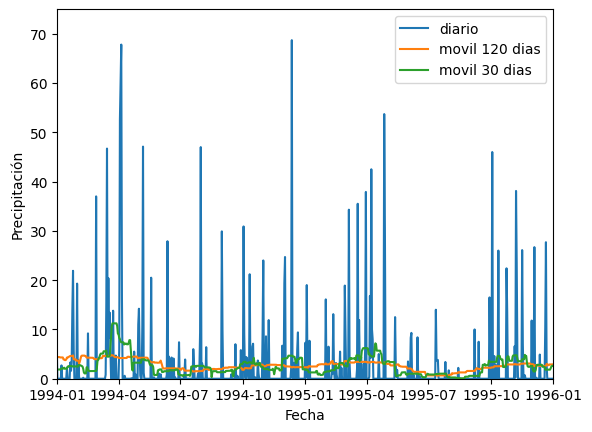

In [63]:
# grafico lluvias diarias
sns.lineplot(data=df_lluvia,x='Fecha',y='Precipitación',label='diario')

# grafico medias moviles
sns.lineplot(data=df_lluvia,x='Fecha',y='mov_120',label='movil 120 dias')
sns.lineplot(data=df_lluvia,x='Fecha',y='mov_30',label='movil 30 dias')

# limito grafico a 2 años
plt.xlim(pd.Timestamp('1994-Jan'), pd.Timestamp('1996-Jan'))
plt.ylim(0,75)
plt.show()

Recién graficamos las lluvias en el tiempo. ¿Pero qué pasa si quiero ver las lluvias en función del mes del año?

!Lo único que tengo que hacer es cambiar el eje X!

Ahora, por cada mes tengo como 3000 datos de lluvias diarias dentro de ese mes. Seaborn, entonces me grafica una línea sólida con el valor medio y una sombra que es el "intervalo de confianza" (los cuantiles 5% y 95%).

¡Verán que así se ve mucho más clara la estacionalidad de los datos!

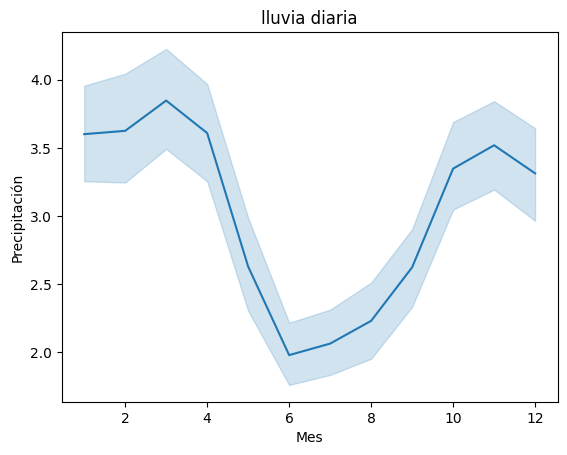

In [64]:
sns.lineplot(data=df_lluvia,x='Mes',y='Precipitación').set(title='lluvia diaria')
plt.show()

Lo mismo puedo hacer para el acumulado mensual. Notarán que el gráfico es un poco distinto, ¿por qué?

¡Porque los meses tienen distinta cantidad de días! (noten la mini caida en Febrero)

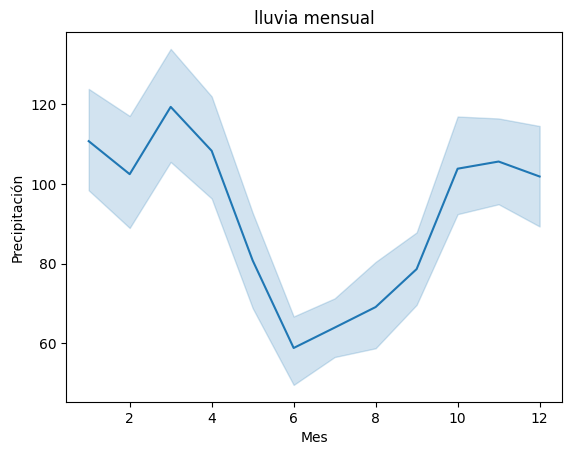

In [65]:
sns.lineplot(data=df_mensual,x='Mes',y='Precipitación').set(title='lluvia mensual')
plt.show()

Simplemente para hacer explícito lo que dijimos de que tengo muchos datos por mes, abajo graficamos la luvia acumulada mensual para 4 de los años disponibles. Esas líneas son las que quedan agrupadas en un valor medio y un intervalo de confianza visto arriba.

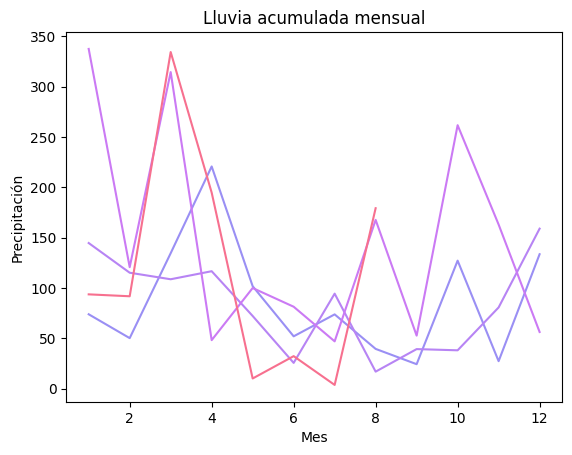

In [66]:
sns.lineplot(data=df_mensual[np.isin(df_mensual['Año'],[1994,1998,2001,2024])],x='Mes',y='Precipitación',hue='Año',legend=False)
plt.title('Lluvia acumulada mensual')
plt.show()

#### Histogramas

Como vimos antes, una buena forma de analizar los datos es contarlos. Nos da una idea de probabilidad, y a futuro podremos proponer *funciones de probabilidad* con la cual ajustar los datos para luego predecir.

Por ejemplo, puedo contar cuántas veces vi determinada cantidad de lluvia.

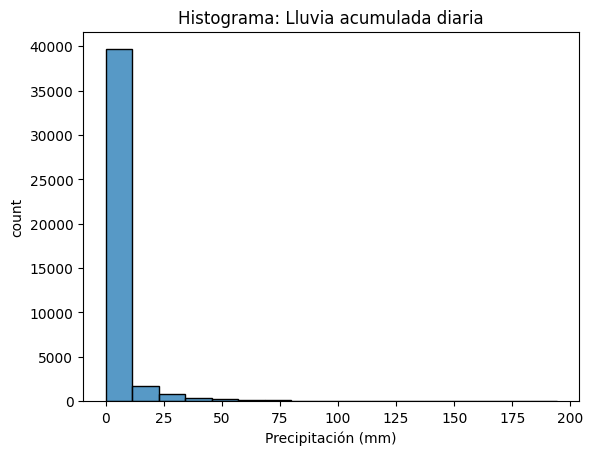

In [67]:
sns.histplot(data=df_lluvia,x='Precipitación',bins='sturges').set(title='Histograma: Lluvia acumulada diaria',
                                                                 ylabel='count', xlabel='Precipitación (mm)')
plt.show()

Como ven, la gran mayoría de las veces ni siquiera llueve. Nos conviene entonces, tal vez, analizar los datos de la siguiente forma

- Cuántas veces llueve
- Si llovió, cuánto llovió

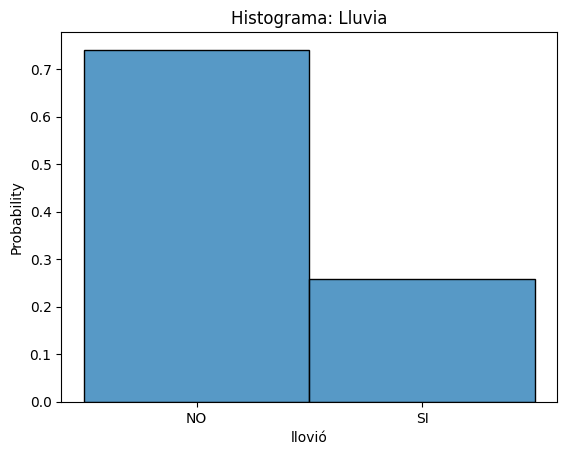

In [68]:
sns.histplot(data=df_lluvia,x='llovió',stat='probability').set(title='Histograma: Lluvia')
plt.show()

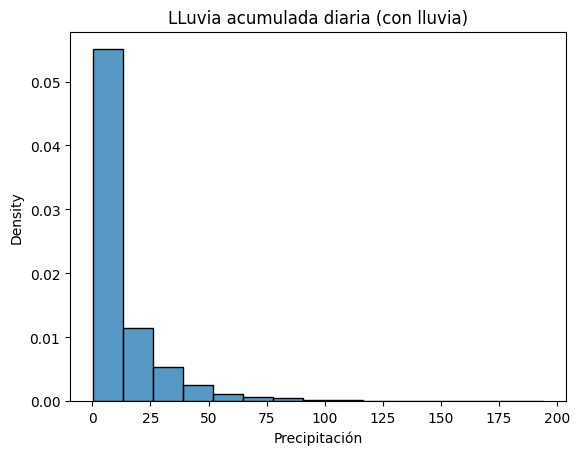

In [69]:
sns.histplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Precipitación',bins='sturges',stat='density').set(title='LLuvia acumulada diaria (con lluvia)')
plt.show()

El gráfico anterior puede ser suavizado en ventanas, de forma tal de generar una *función de densidad de probabilidad empírica*.

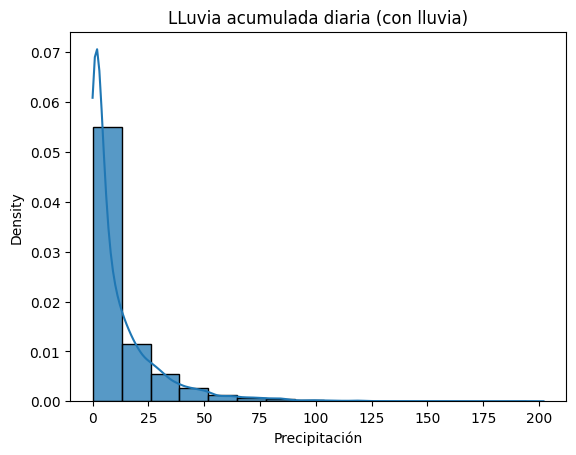

In [70]:
sns.histplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Precipitación',bins='sturges',stat='density').set(title='LLuvia acumulada diaria (con lluvia)')
sns.kdeplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Precipitación',clip=[0,np.nan])
plt.show()

A su vez, si es una función de densidad, entonces puede ser integrada para obtener una *función de probabilidad acumulada empírica*, con la opción `cumulative=True`

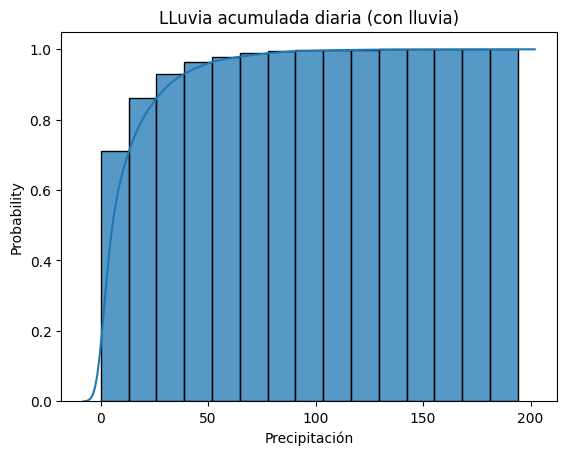

In [71]:
sns.histplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Precipitación',bins='sturges',stat='probability',cumulative=True).set(title='LLuvia acumulada diaria (con lluvia)')
sns.kdeplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Precipitación',cumulative=True)
plt.show()

Así como en los gráficos de serie incluí la variable mes, lo mismo puedo hacer en mis histogramas. ¿El mes afectará la probabilidad de lluvia o tormenta fuerte?

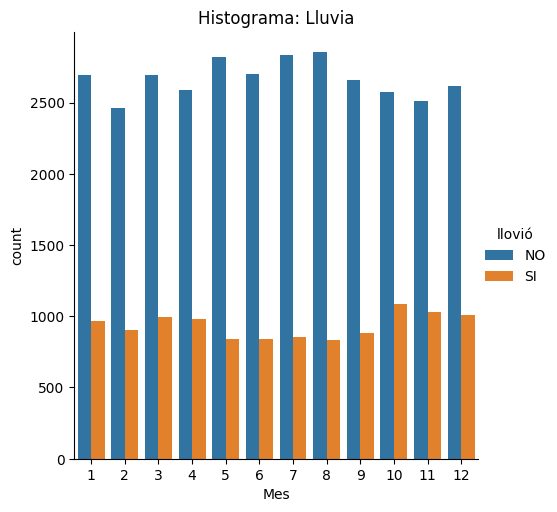

In [72]:
sns.catplot(data=df_lluvia,x='Mes',hue='llovió',kind='count').set(title='Histograma: Lluvia')
plt.show()

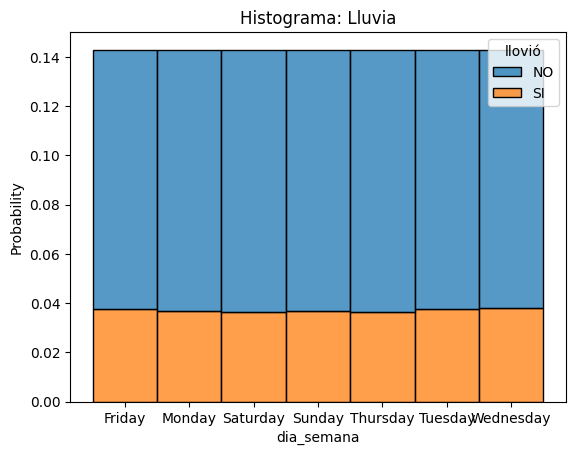

In [73]:
sns.histplot(data=df_lluvia,x='dia_semana',hue='llovió',stat='probability',multiple='stack').set(title='Histograma: Lluvia')
plt.show()

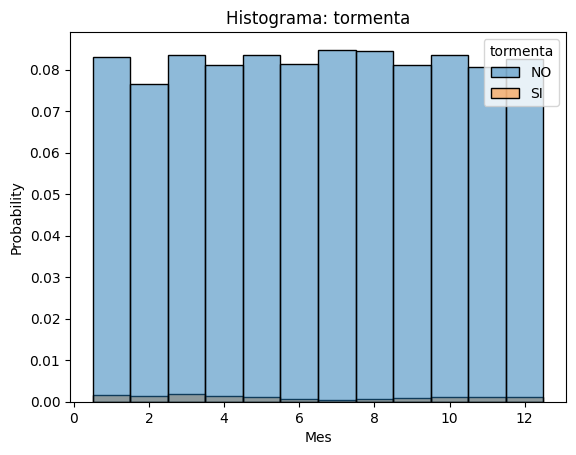

In [74]:
sns.histplot(data=df_lluvia,x='Mes',hue='tormenta',stat='probability').set(title='Histograma: tormenta')
#plt.ylim([0,0.005])
plt.show()

¡Pareciera que el mes afecta en la probabilidad de tormentas! Al menos, esa es una **hipótesis de trabajo**

Pero me surge una duda. ¿lloverá más en octubre porque hay más tormentas o porque sus tormentas son más fuertes?

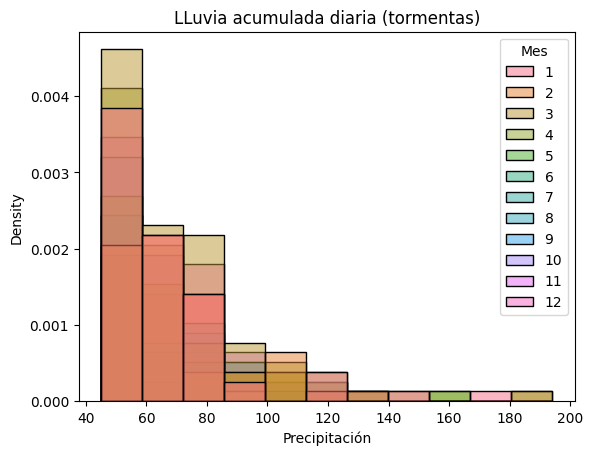

In [75]:
sns.histplot(data=df_lluvia[df_lluvia['Precipitación']>45],x='Precipitación',hue='Mes',bins='sturges',stat='density').set(title='LLuvia acumulada diaria (tormentas)')
plt.show()

Y... habrá que armar un modelo y analizarlo. Algo parecido podemos hacer pero para los días de lluvia en general, no solo tormentas.

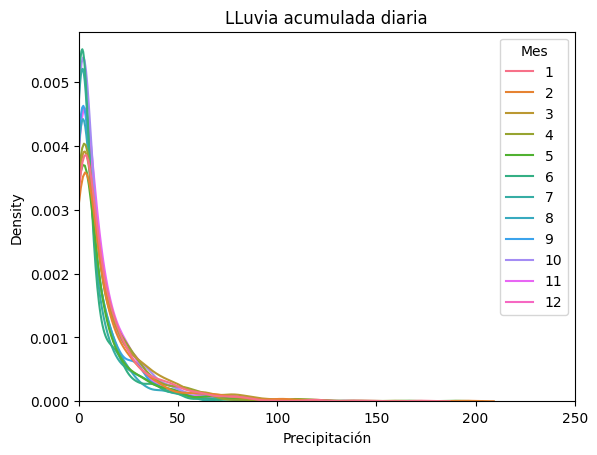

In [76]:
sns.kdeplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Precipitación',hue='Mes',clip=[0,np.nan]).set(title='LLuvia acumulada diaria')
plt.xlim([0,250])
plt.show()

La verdad, ¡parecen ser distintos!

Mi hipótesis de trabajo es esta.

- En los meses del año la probabilidad de que llueva es muy parecida
- cuando llueve, la precipitación sí depende de cada mes, y por eso la probabilidad de tormenta varía.

¡Tendremos que armar un modelo a ver si eso se ajusta bien!

Por otro lado, ahí graficamos la distribución empírica de la lluvia diaria para una lluvia cualquiera en cada mes.

Lo mismo podemos hacer, por ejemplo, para la máxima lluvia diaria en el año.

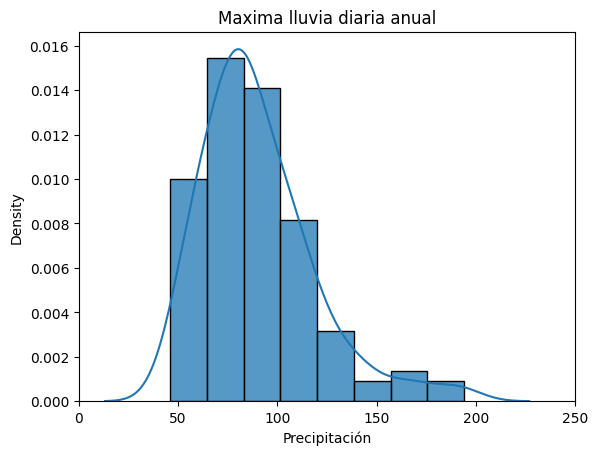

In [77]:
sns.histplot(data=df_max,x='Precipitación',bins='sturges',stat='density').set(title='Maxima lluvia diaria anual')
sns.kdeplot(data=df_max,x='Precipitación')
plt.xlim([0,250])
plt.show()

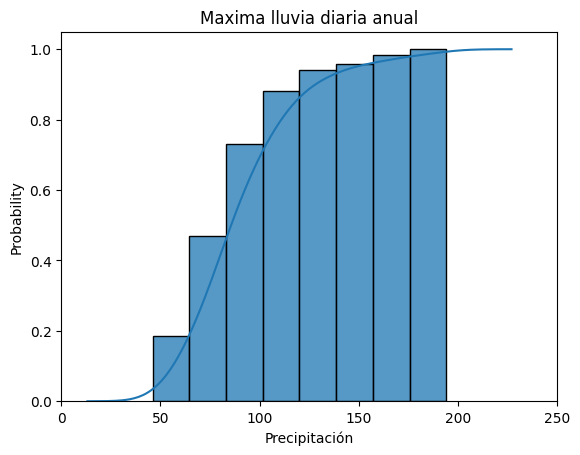

In [78]:
sns.histplot(data=df_max,x='Precipitación',bins='sturges',stat='probability',cumulative=True).set(title='Maxima lluvia diaria anual')
sns.kdeplot(data=df_max,x='Precipitación',cumulative=True)
plt.xlim([0,250])
plt.show()

#### Boxplots

Los boxplots son, en gran medida, una condensación de los gráficos vistos hasta ahora.

En vez de mostrarme la distribución de probabibilidad empírica, o los datos con un intervalo de confianza, muestra básicamente ciertos valores estádisticos de los datos.

Estos son:
- La mediana (cuantil 0.5)
- los cuántiles 0.25 y 0.75, que definen la caja o "box"
- los "whiskers", definido como 1.5 veces el rango intercuantil
- los "outliers": datos que caen fuera de los whiskers.

En general, tienen **menos información** que los gráficos anteriores, pero pueden servir para visualizar diferencias rápidamente.

Por ejemplo, veamos nuevamente el efecto del mes en las precipitaciones.

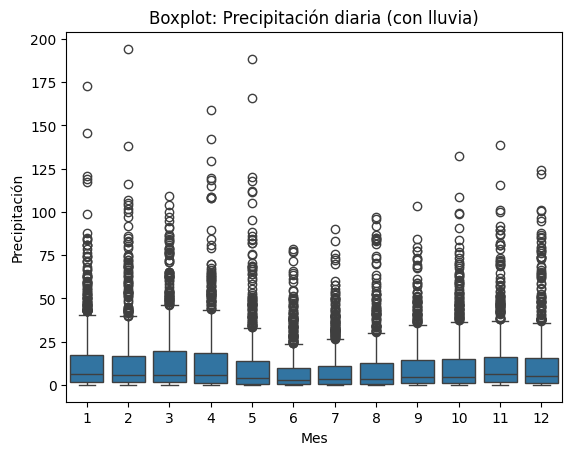

In [79]:
sns.boxplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='Mes',y='Precipitación').set(title='Boxplot: Precipitación diaria (con lluvia)')
plt.show()

**NOTA**: Claramente no son "outliers", simplemente esa una distribución con mucha asimetría y las definiciones de whiskers son poco útiles en estos casos (por eso, no se casen con los boxplots).

Una pregunta que me hacía era, ¿parece que llueve más los fines de semana en serio?

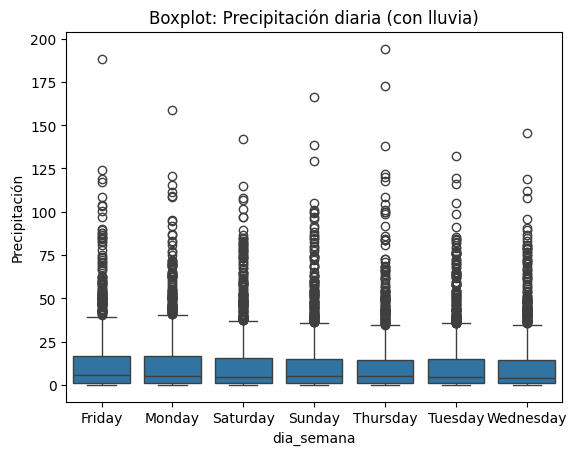

In [80]:
sns.boxplot(data=df_lluvia[df_lluvia['Precipitación']>0],x='dia_semana',y='Precipitación').set(title='Boxplot: Precipitación diaria (con lluvia)')
plt.show()

Bueno, no :P

Así se puede mirar otras cosas. Por ejemplo, cómo claramente llueve más cuando hay tormenta que no (obviamente, así lo definí yo. Pero para que vean cómo un boxplot puede mostrar diferencias).

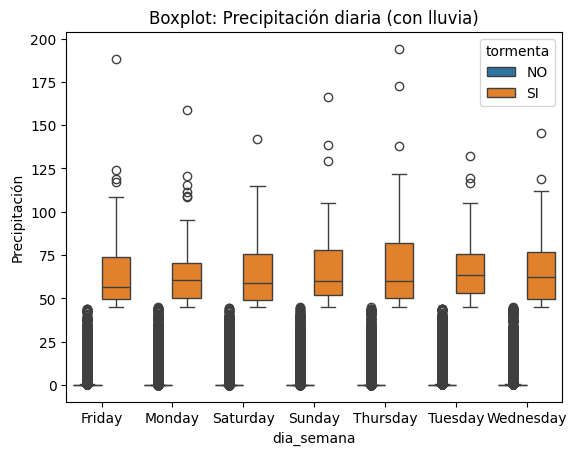

In [81]:
sns.boxplot(data=df_lluvia,x='dia_semana',y='Precipitación',hue='tormenta').set(title='Boxplot: Precipitación diaria (con lluvia)')
plt.show()

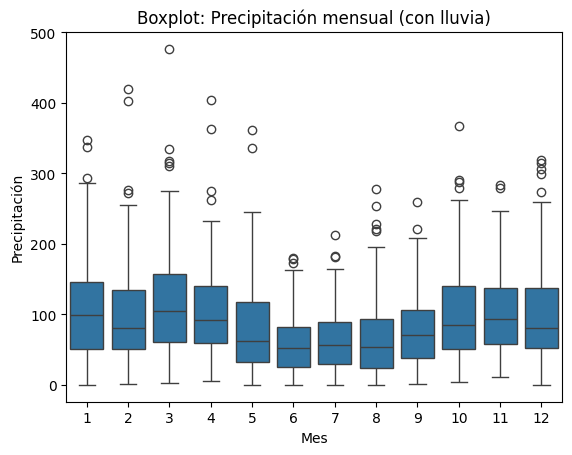

In [82]:
sns.boxplot(data=df_mensual,x='Mes',y='Precipitación').set(title='Boxplot: Precipitación mensual (con lluvia)')
plt.show()

## Parte 3: Dataset edifcios en California

Para esta Parte 3 vamos a ver un dataset que tiene más variables continuas. Este dataset construido durante décadas fue utilizada para genarar ecuaciones de predicción del Período Natural de edificiones.

Esas ecuaciones se usan, al día de hoy, en la mayoría de los reglamentos mundiales de ingeniería sísmica (con modificaciones propias de cada región).

Entonces, ¿cómo podemos predecir el período natural de un edificio? Veamos...

### Carga del Dataset

Este dataset viene super prolijo (porque fue curado a mano por nosotros...). Pero bueno, significa que no necesitamos una limpieza.

In [83]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving GoelChopraPeriod.csv to GoelChopraPeriod.csv


In [84]:
import io

#Se crea un DataFrame
df_chopra = pd.read_csv(io.BytesIO(uploaded['GoelChopraPeriod.csv']))
df_chopra

,Structure,No.,Location,ID number,No. of Stories,Height [ft],Width [ft],Length [ft],Ac [sq ft],Ae [%],Earthquake,PGA [g],PGA > 0.15g,Period T [s],Direction
0,RC MRF,1,Emeryville,NaN,30.0,300.0,NaN,NaN,NaN,NaN,Loma Prieta,NaN,No,2.80,Longitudinal
1,RC MRF,2,Los Angeles,NaN,9.0,120.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.40,Longitudinal
2,RC MRF,3,Los Angeles,NaN,14.0,160.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.80,Longitudinal
3,RC MRF,4,Los Angeles,NaN,13.0,166.0,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.90,Longitudinal
4,RC MRF,5,Los Angeles,ATC_12,10.0,137.5,NaN,NaN,NaN,NaN,San Fernando,NaN,No,1.40,Longitudinal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,RC SW,23,San Jose,C57356,10.0,96.0,64.0,210.0,84.5,0.2563,Loma Prieta,0.13,No,0.43,Transverse
230,RC SW,24,San Jose,C57356,10.0,96.0,64.0,210.0,84.5,0.2563,Loma Prieta,0.13,No,0.42,Transverse
231,RC SW,25,San Jose,C57356,10.0,96.0,64.0,210.0,84.5,0.2563,Morgan Hill,0.06,No,0.43,Transverse
232,RC SW,26,San Jose,C57356,10.0,96.0,64.0,210.0,84.5,0.2563,Mount Lewis,0.04,No,0.41,Transverse


### Visualización

#### Pair plot

Un pairplot es básicamente un gráfico de puntos X-Y que relaciona todas las variables continuas entre sí, generando una matriz de ploteos.

Su principal función es doble.
- Por un lado, en la diagonal me permite ver el histograma de las variables (la forma de los datos disponibles)
- Por otro, en las cruzadas me permite ver la relación entre ellas (rectas, curvas, independientes, etc.)

Con ello, me puedo dar una idea de si:
- dos variables predictoras son muy parecidas entre sí
- hay variables que predicen la que a mi me interesa (aportan información)

Por ejemplo, en este caso, podemos ver que el período está muy correlacionado con la altura y el número de pisos.

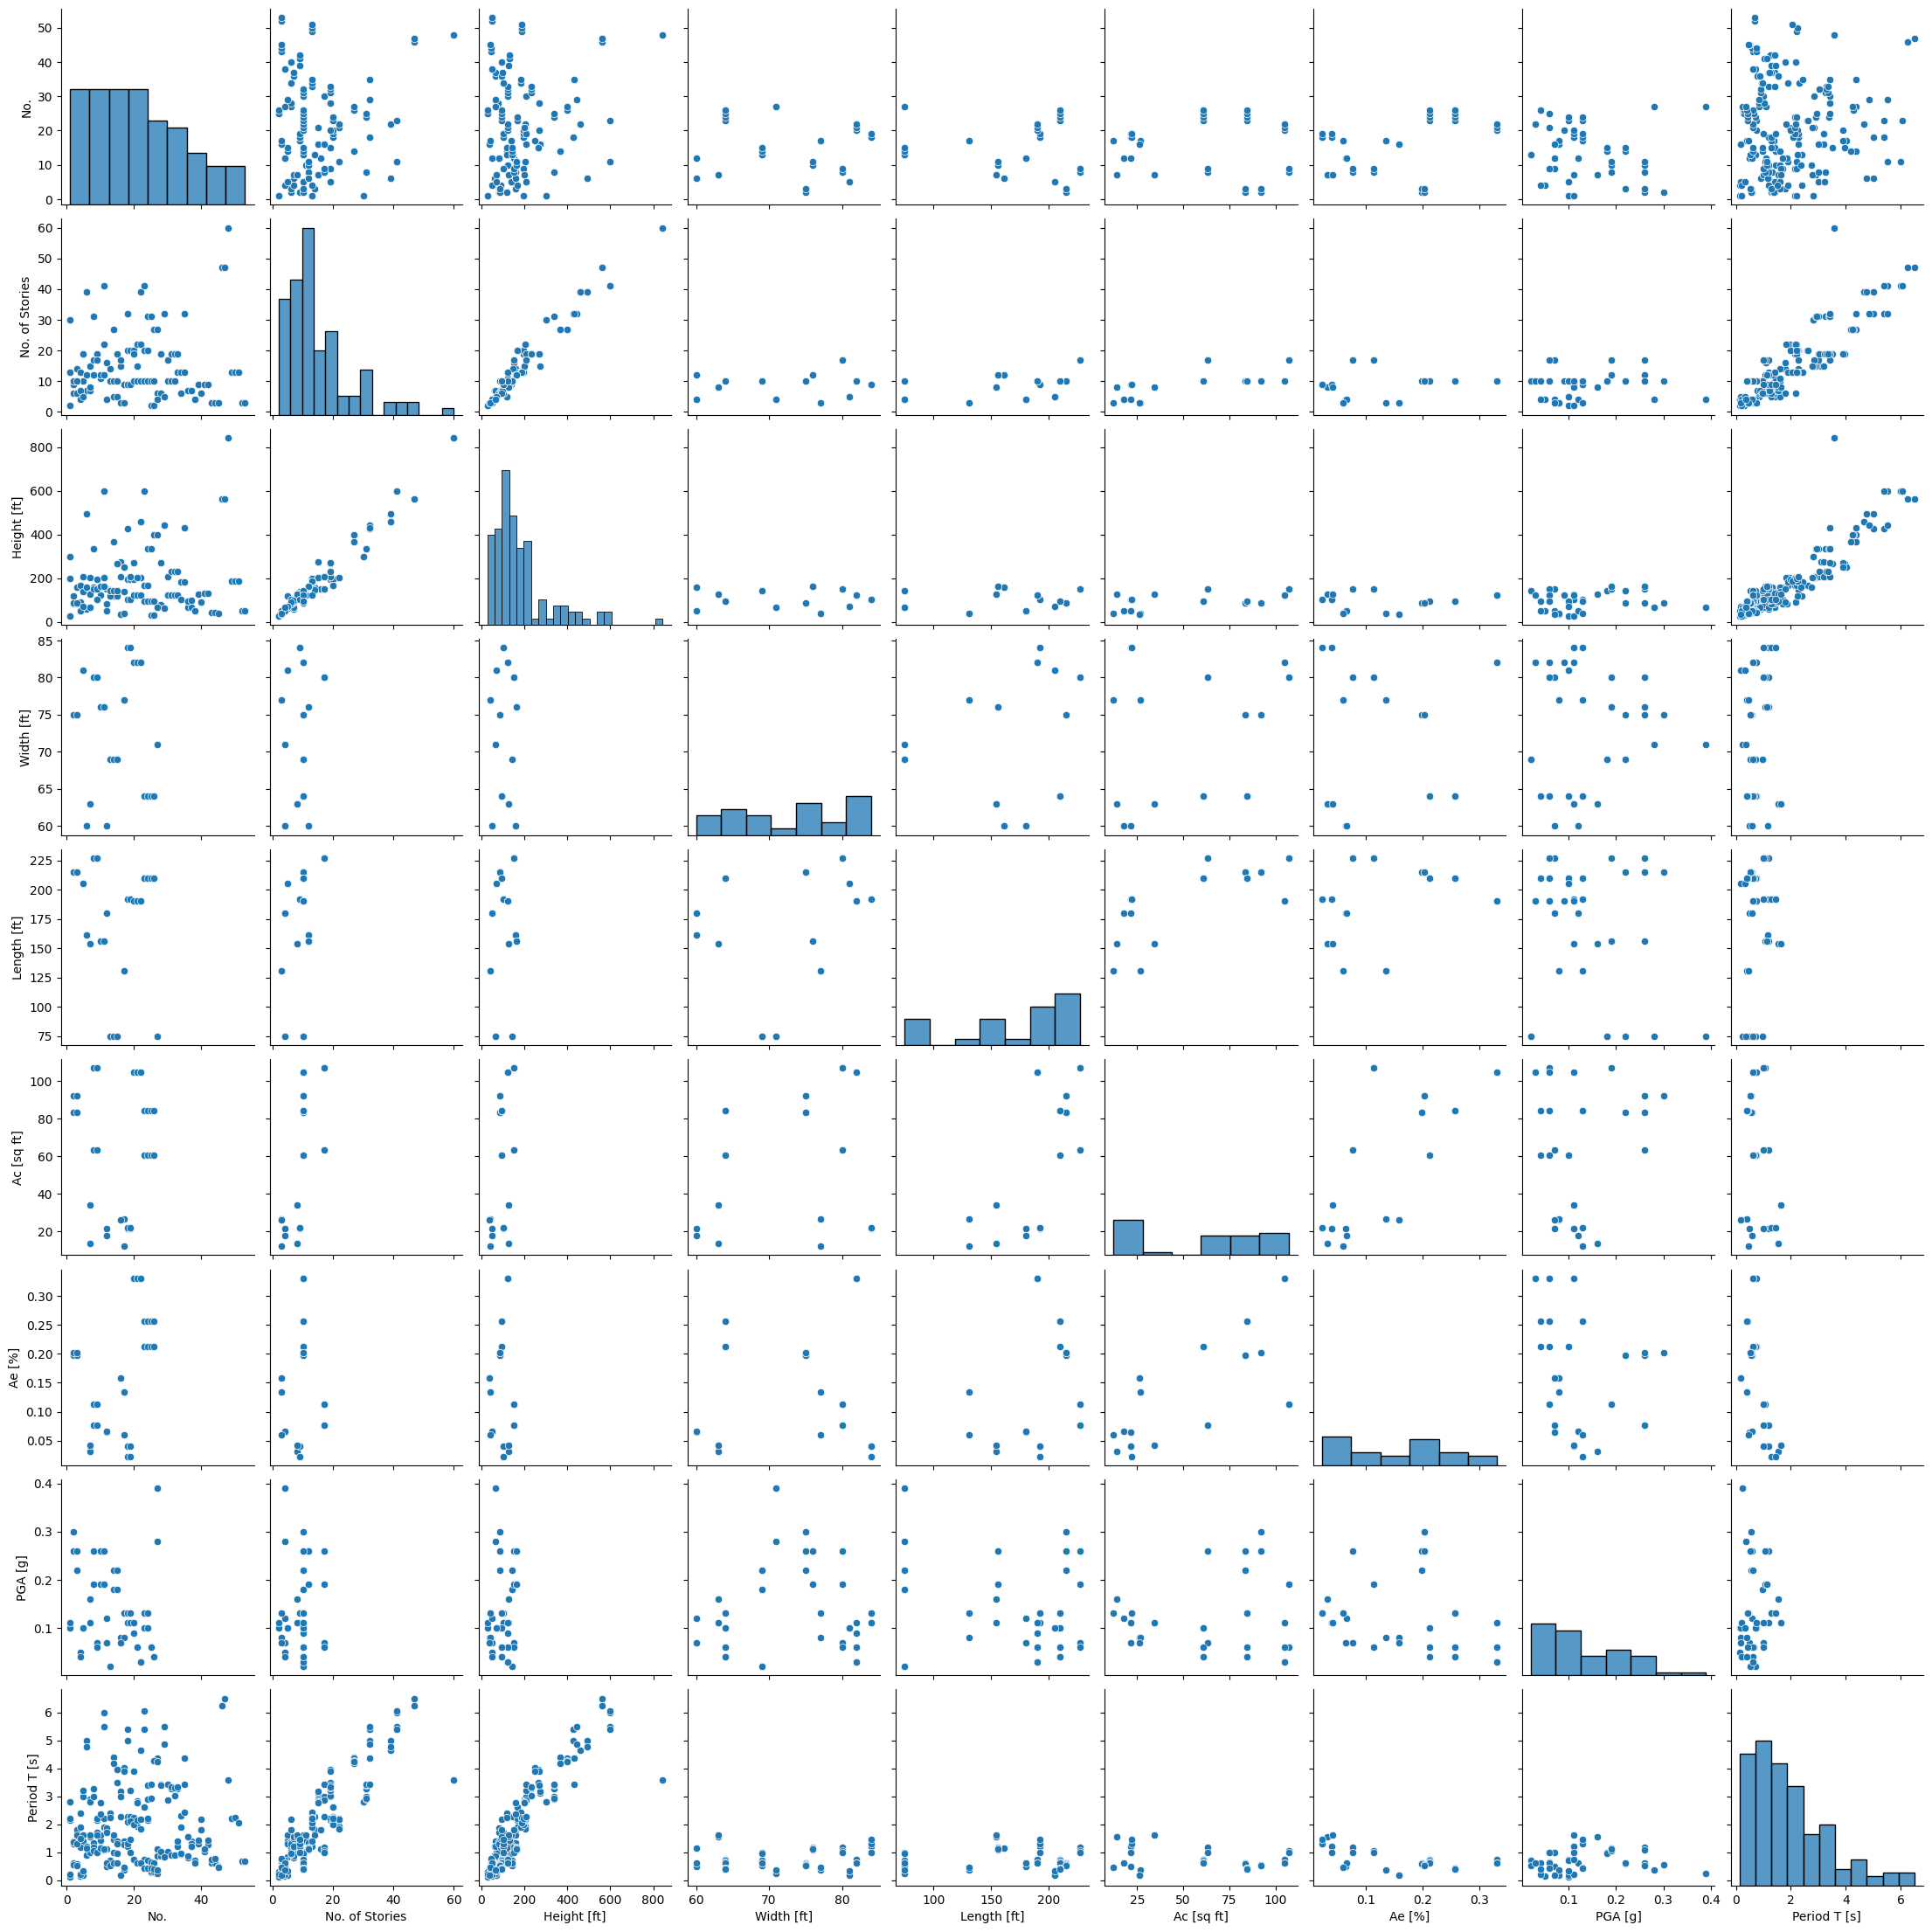

In [85]:
# pair plot
sns.pairplot(df_chopra)
plt.show()

Sin entrar en detalles, algunas de las variables de arriba son "auxiliares". Podemos, entonces, elegir qué variables mostrar en el pairplot explícitamente.

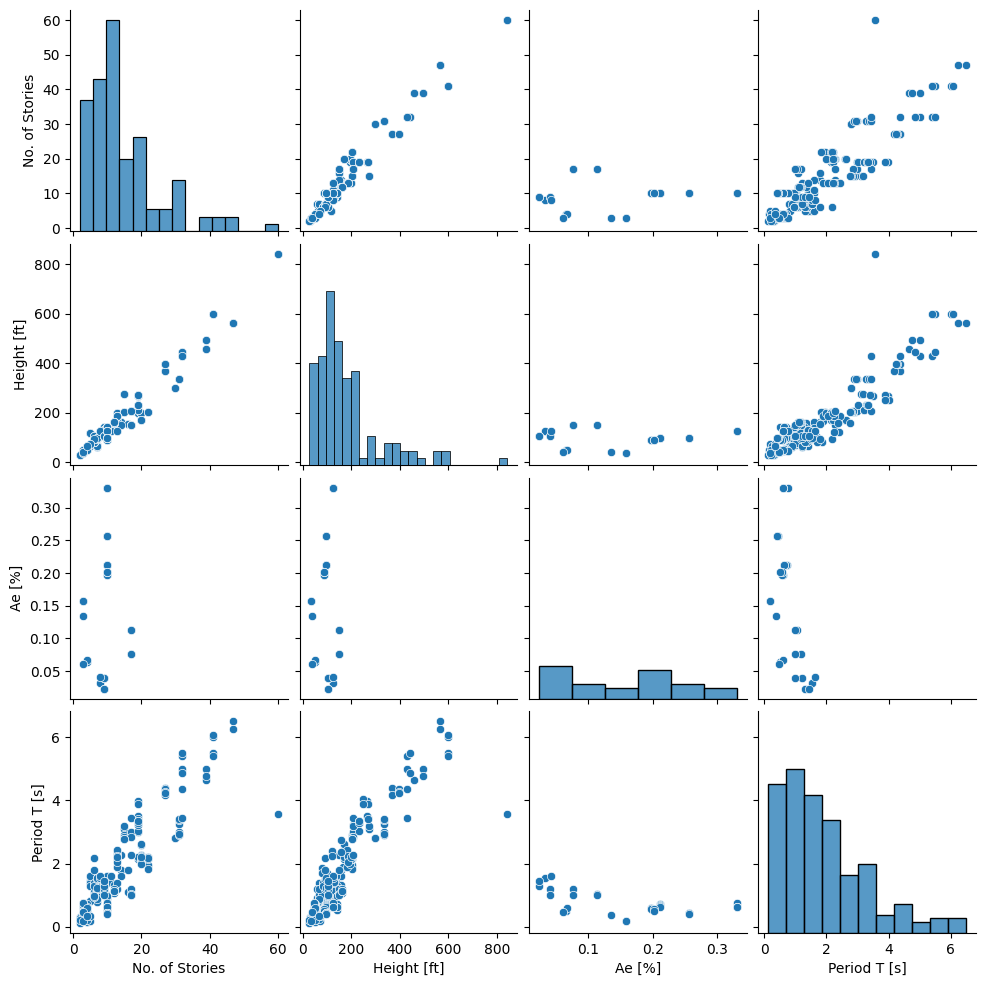

In [86]:
# seleccionar variables
seleccion = ['No. of Stories','Height [ft]','Ae [%]','Period T [s]']

# pair plot
sns.pairplot(data=df_chopra,vars=seleccion)
plt.show()

No siempre la relación entre variables es igual cuando tengo también variables categóricas. Las variables pueden interactuar entre sí, ¡generando nuevas relaciones!. Por ejemplo, ¿habrá influencia de la acelaración del suelo en el período? (la teoría indicaría que sí, por fisuración).

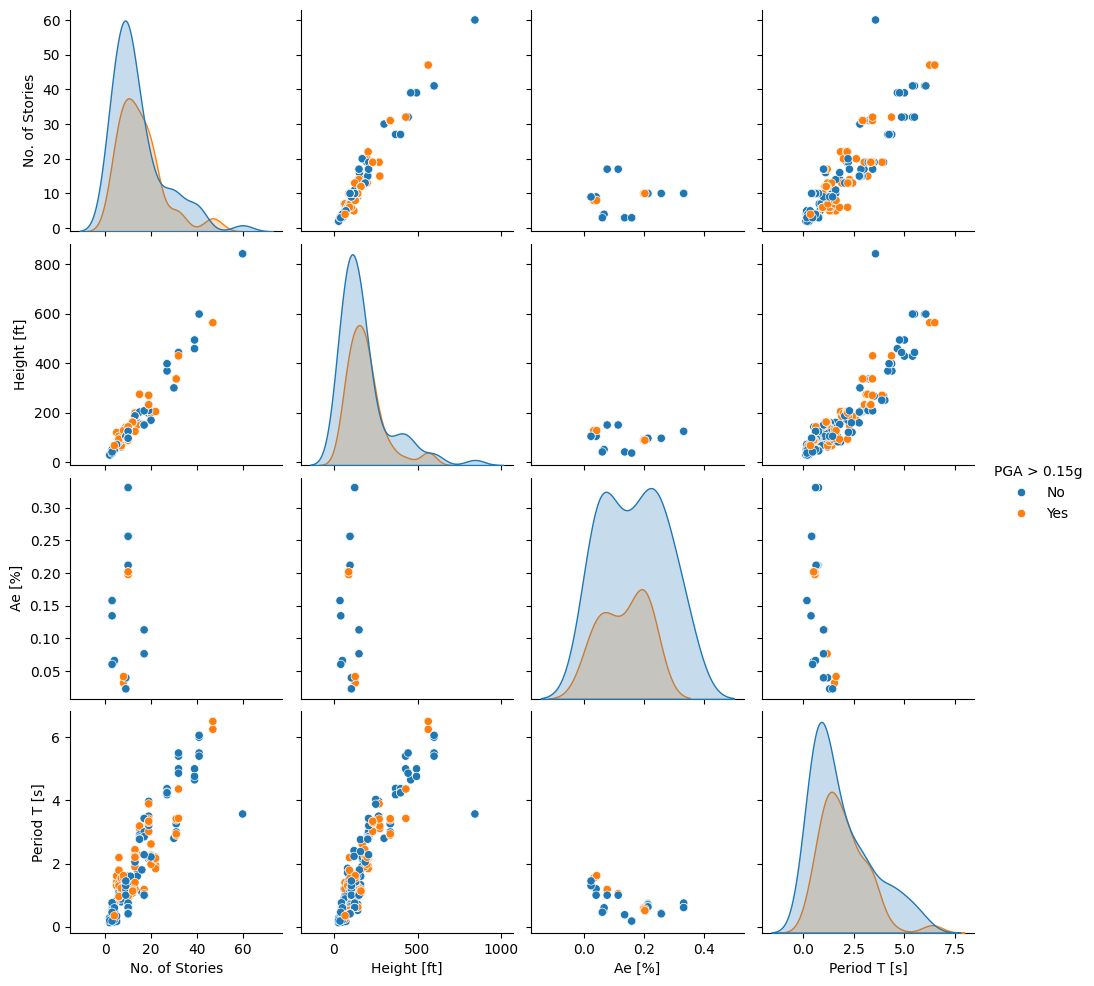

In [87]:
# pair plot
sns.pairplot(data=df_chopra,vars=seleccion,hue='PGA > 0.15g')
plt.show()

Del mismo modo, ¿la relación altura-período cambiará con la tipología estructural?

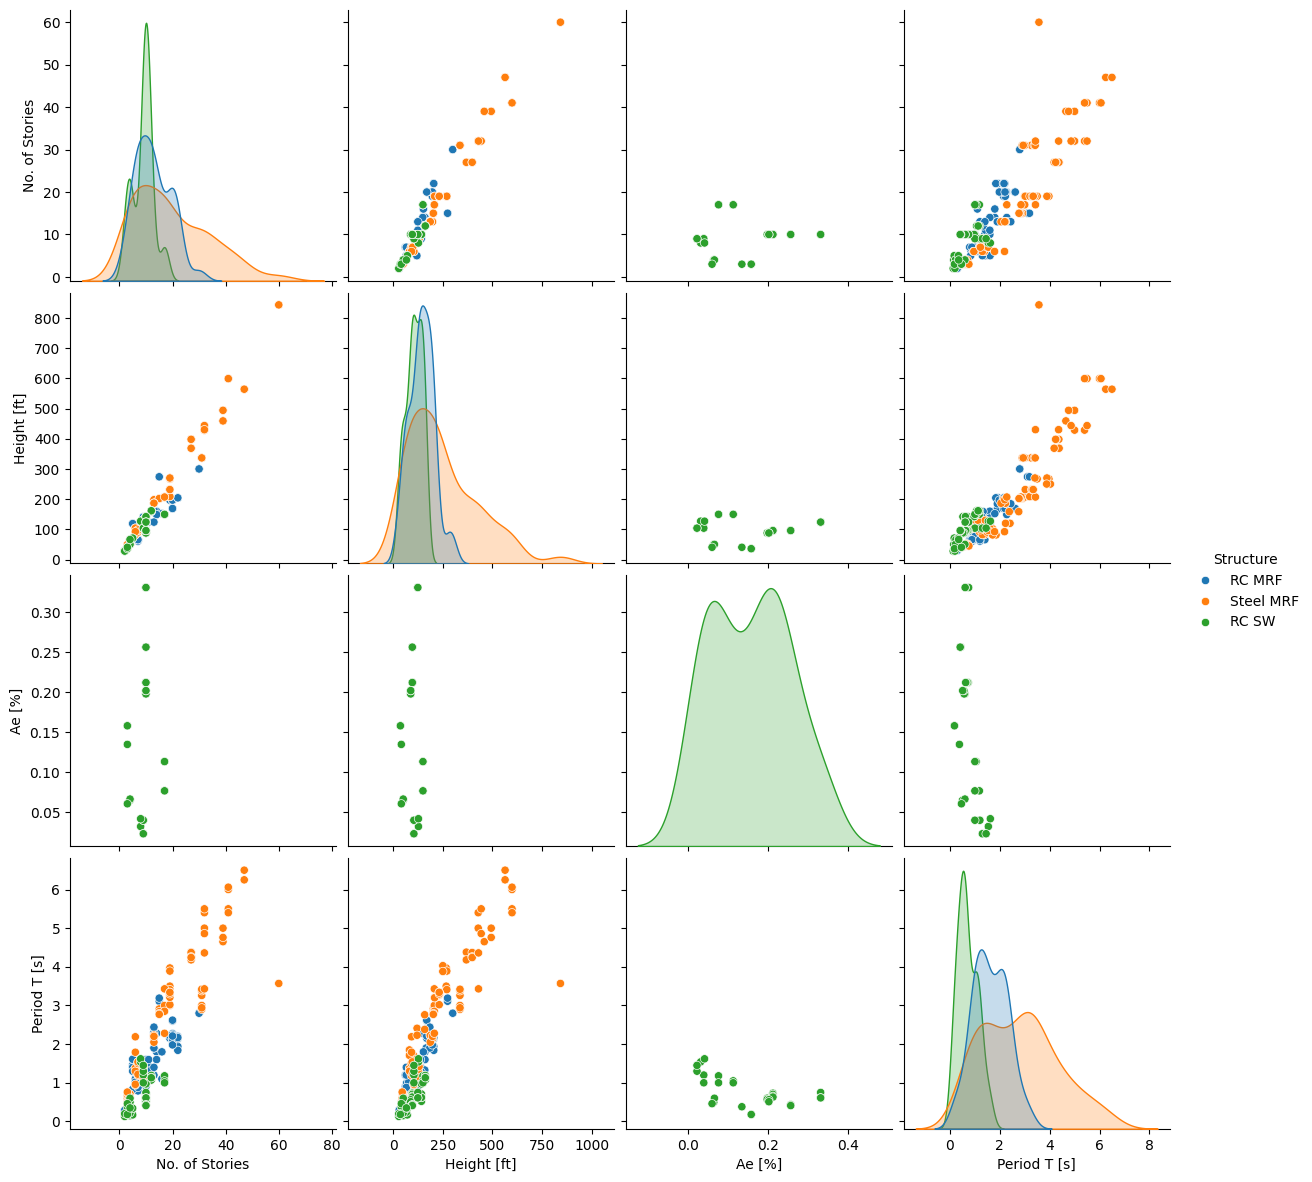

In [98]:
# pair plot
sns.pairplot(data=df_chopra,vars=seleccion,hue='Structure',height=3)
plt.show()

Recién miré el efecto de la tipología y de la magnitud del sismo por separado. Pero ¿y si las combino? Es probable que juntar los dos datos aporte información.

Por ejemplo, el acero no se fisura como el hormigón, ¡la influencia de la magnitud es otra totalmente!

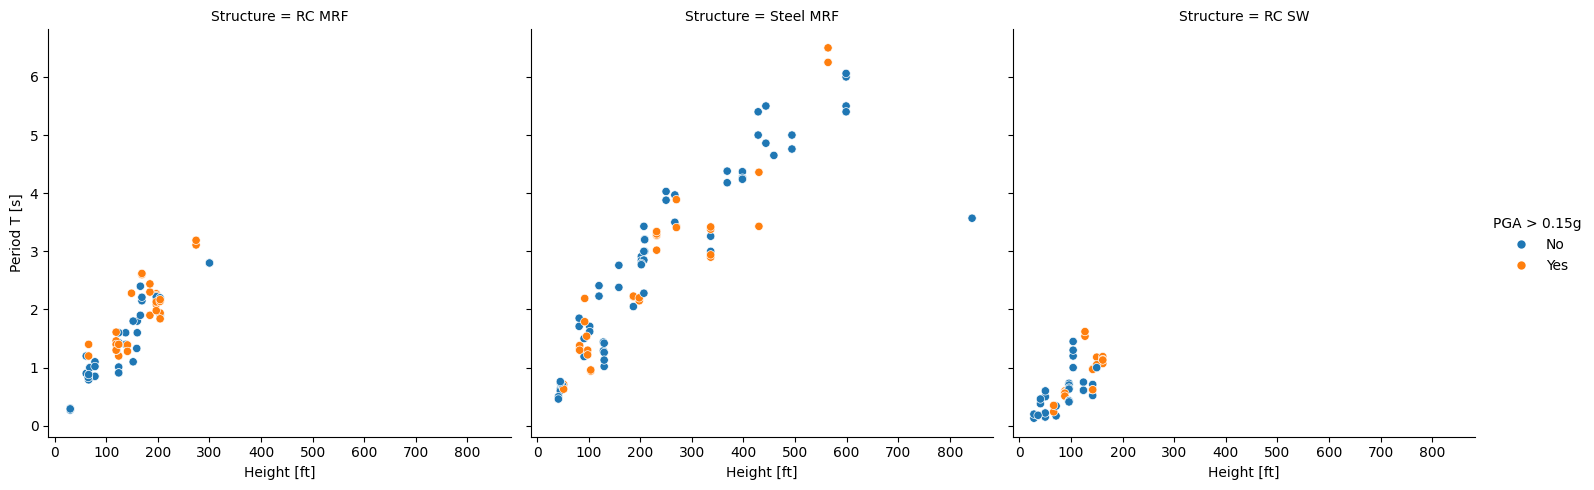

In [91]:
sns.relplot(data=df_chopra,x='Height [ft]',y='Period T [s]',col='Structure', hue='PGA > 0.15g',kind='scatter')
plt.show()

Y, efectivamente, se nota cierta diferencia. Esto es clave: **No alcanza con analizar las variables de a una. Combinen**.

Segunda nota: Estas son hipótesis a chequear con un modelo, no conculsiones. Pero mientras más miro, mejores cosas se me ocurren plantear.

Por último, tengan en cuenta que aveces ciertas cosas se ven mejor cuando se trabaja en escala logarítmica. Es común para

- Relaciones curvas
- Datos con mucha asimetría derecha (lognormales), o que sólo toman valores positivos.

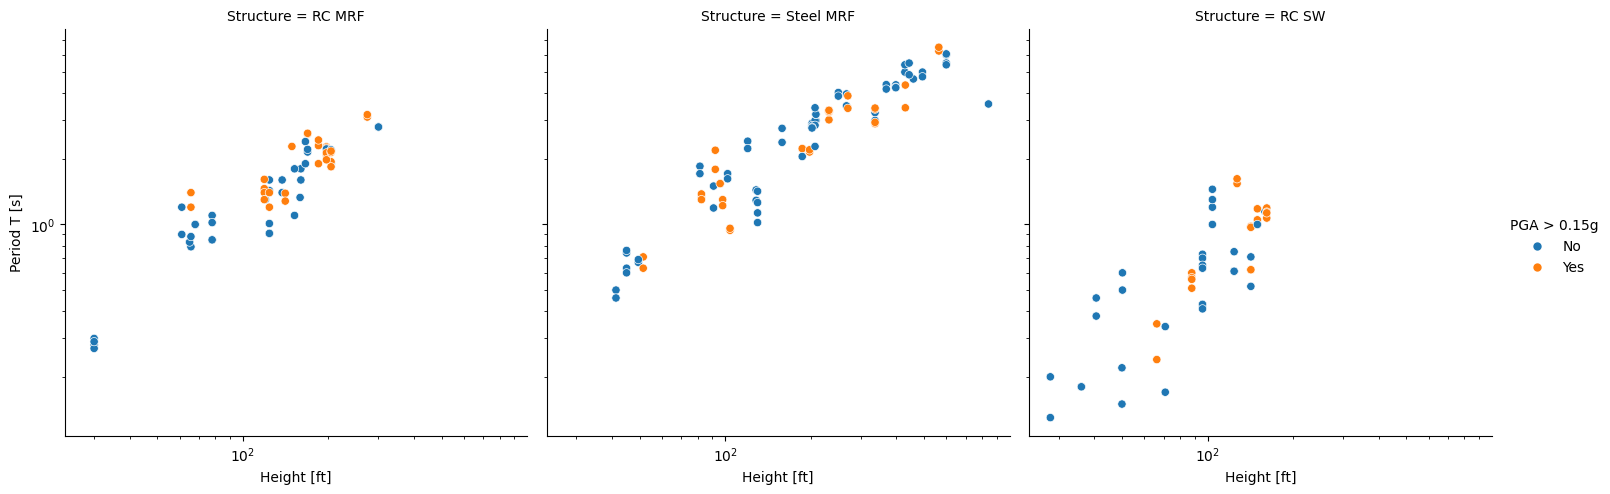

In [92]:
# pair plot
sns.relplot(data=df_chopra,x='Height [ft]',y='Period T [s]',col='Structure', hue='PGA > 0.15g',kind='scatter')
plt.yscale('log')
plt.xscale('log')
plt.show()

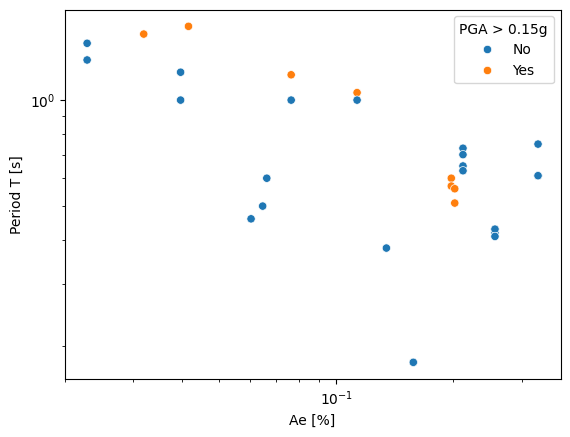

In [93]:
# pair plot
sns.scatterplot(data=df_chopra,x='Ae [%]',y='Period T [s]',hue='PGA > 0.15g')
plt.yscale('log')
plt.xscale('log')
plt.show()

#### Heatmap

El heatmap es a los pair-plots lo que el boxplot es a los histogramas y registros. Es decir, una peor forma de visualizar lo mismo (:P )

En sí es una sintetización, dando valor numérico y mostrando con colores la correlación entre las variables continuas. Valores cercanos a 1 y -1 indican correlación **lineal** entre variables, pero nada me dice en casos no lineales y demás. Hay que entenderlo con cuidado.

Sin embargo, en conjunto con el pair plot me da una buena idea de que variables podrían llegar a predecir otras. Lamentablemente, los hacen de *a una por vez*, ¡no puede considerar el efecto beneficioso de combinarlas!

In [94]:
df_chopra[seleccion].corr()

,No. of Stories,Height [ft],Ae [%],Period T [s]
No. of Stories,1.000000,0.968747,0.102087,0.878045
Height [ft],0.968747,1.000000,0.033131,0.899868
Ae [%],0.102087,0.033131,1.000000,-0.607044
Period T [s],0.878045,0.899868,-0.607044,1.000000


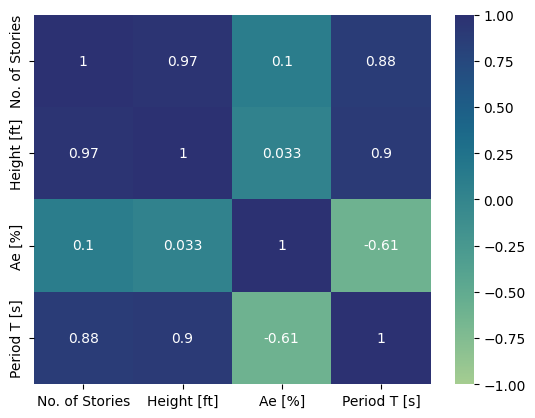

In [95]:
sns.heatmap(data=df_chopra[seleccion].corr(),annot=True,vmin=-1,vmax=1,cmap='crest')
plt.show()

Meter variables categóricas dentro de un Heatmap es un sin sentido, no existe correlación en el caso categórico. Sin embargo, sí es posible ver qué influencia pueden llegar a tener al generar Heatmaps separados por categoría.

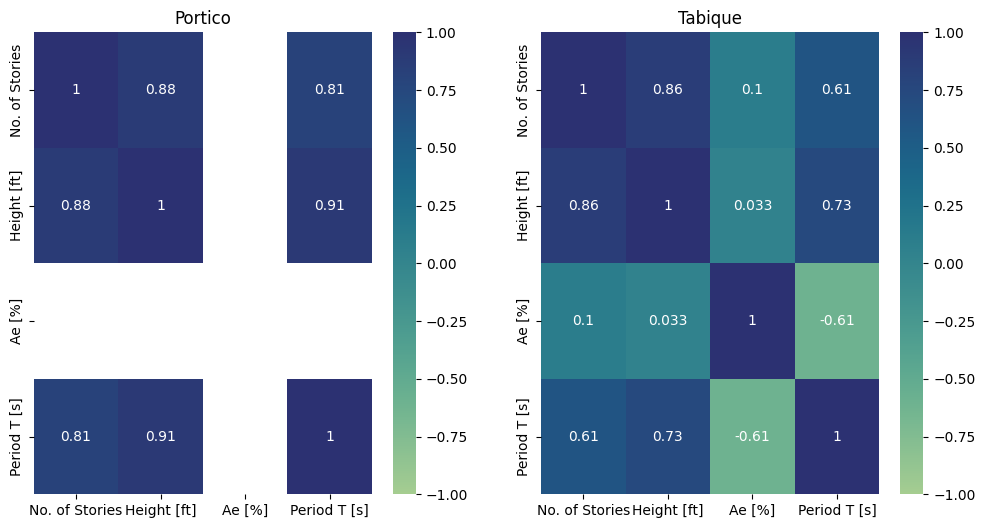

In [96]:
# crear subfigura, con heatmap separados para categorias de edificios
fig,ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(data=df_chopra[df_chopra['Structure']=='RC MRF'][seleccion].corr(),annot=True,vmin=-1,vmax=1,cmap='crest',ax=ax[0])
sns.heatmap(data=df_chopra[df_chopra['Structure']=='RC SW'][seleccion].corr(),annot=True,vmin=-1,vmax=1,cmap='crest',ax=ax[1])
ax[0].set_title('Portico')
ax[1].set_title('Tabique')

plt.show()

Aquí, por ejemplo, se ve que la correlación Altura-Período es más alta en pórticos de hormigón que en tabiques. Pero, en este últimos, hay también correlación (que vimos, no era lineal) entre el área efectiva del tabique y el período. Tal vez combinando esos dos datos se pueda armar un buen modelo para predecir el período de estos últimos.

Además, se ve que el número de pisos está muy correlacionado con la altura. Es probable que incluir las dos variables en un modelo no aporte información nueva realmente.